輸入立委臉書粉專內容及選舉政見資料

以台中市立委顏寬恒為例，建立發文文字斷詞表

In [300]:
import pandas as pd
import jieba
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb1=pd.read_csv('nysu_10902_2019立委_research.csv') 
fb2=pd.read_csv('nysu_10902_2019_research_right.csv') 
fba=pd.merge(fb1,fb2,how="outer")
fb3=pd.read_csv('nysu_10902_2019立委_research_補.csv')
fb4=pd.read_csv('nysu_10902_2019立委_research_補2.csv')
fbb=pd.merge(fb3,fb4,how="outer") 
fb=pd.merge(fba,fbb,how="outer") 
politics = pd.read_csv('9th_legislator_promise.csv')

fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [301]:
Yan = fb[fb.page_name == "顏寬恒"]
Yan.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
6414,1448047902111768_2194318830818001,1448047902111768,顏寬恒,政治人物,"《龍海國小舊校舍拆除重建，三「心」級的新校舍❤️》\n\n🏫創校已經43年的龍井區龍海國小，東西兩棟校舍已十分，老舊不堪使用，從「違樓評估」開始，寬恒就努力爭取協調‼️\n\n⚠️列為危樓後，寬恒向教育部與台中市政府前後共爭取了總經費1億2,874萬來進行重建工程🚧\n\n🏗昨天進行了動土典禮，將依序拆除東、西棟校舍，並興建✅地上4層樓校舍、✅非營利幼兒園及✅活動中心，讓學校的空間發揮到極大化，也讓附近的鄉親同時能夠享受到學校的設施💪🏻\n\n🙏感謝一路上幫忙的議員、里長和學校師長，師長用心、孩子開心、家長安心，寬恒會繼續努力打造孩子們優質的學習環境❤️\n\n#龍海國小校舍改建\n#師長用心 #孩子開心 #家長安心",NaN,photo,https://www.facebook.com/1448047902111768/posts/2194318830818001/,2019-01-15T03:15:08+0000,2019-01-15T11:15:08,...,顏寬恒貼文的相片,NaN,499,0,0,0,0,0,16,28


In [302]:
Yan[Yan.created_time_taipei == max(Yan.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
6599,1448047902111768_2464745520441996,1448047902111768,顏寬恒,政治人物,您好，明天就要投票了，投誰？大概心裡都有底了吧。\n\n寬恒從2013年擔任立法委員以來，我們對鄉親的態度始終如一，就是「服務」二字，與鄉親的互動再自然不過，沒有太多客套也不必矯情。\n\n印象中我沒有講到過「顧主權」這種模糊的詞彙，一直以來我顧的是鄉親，就像一個大家庭一樣，雖然成員多分了家，散居各地，縱使有些人不認同，有人比較偏激，有人比較認命，但是始終都是一家人，寬恒的角色也就是替這一大家子的人去外面，向統治者爭取該有的福利跟建設，避免被統治者吃夠夠，這幾年來的表現，相信鄉親們也都看在眼裡，捫心自問，仰不愧於天，俯不愧於地！\n\n昨天在徒步遊行後回到總部，電視正在重播凱道上的盛況，趙少康先生的一席話，我覺得很值得大家的省思，馬英九時代因為財政困難削減了軍公教人員的年終慰問金，所以2016年軍公教憤怒不出來投票，導致蔡英文就當選了，她一當選馬上大砍年金，而且為了政治利益越來越鎖國，用恐懼嚇阻人民的自由，這三年多難道還看得少。\n\n各位該怎麼做，大家經過幾個月的喧騰，今晚靜下心來，好好的思考一下。\n寬恒沒有華麗的口才，但是在這個選區大家庭，我實實在在的做，大家有目共睹。\n\n明天過後，一切將回歸平靜，寬恒也祝大家晚安，也跟大家拜個早年，新年快樂...,NaN,photo,https://www.facebook.com/1448047902111768/posts/2464745520441996/,2020-01-10T13:30:06+0000,2020-01-10T21:30:06,...,NaN,NaN,5205,0,0,0,0,0,172,38


In [303]:
Yan[Yan.created_time_taipei == min(Yan.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
6418,1448047902111768_2185210188395532,1448047902111768,顏寬恒,政治人物,🇹🇼連續第七年來參加龍井公所的升旗典禮‼️\n\n龍井農會林總幹事說我「及格了」，因為現在簡單調查一下，連續來超過七年的鄉親朋友不是很多😊😊😊\n\n⛅️每年元旦的第一個行程就是來龍井公所報到，參加升旗典禮和健行活動💪🏻💪🏻💪🏻\n\n祝福 大家2019，活力99、健康99，新年快樂🎉🎉🎉\n\n#龍井公所升旗典禮,NaN,photo,https://www.facebook.com/1448047902111768/posts/2185210188395532/,2019-01-01T00:12:37+0000,2019-01-01T08:12:37,...,顏寬恒貼文的相片,NaN,1016,0,0,0,0,0,26,32


In [304]:
Yan['new_date'] = pd.to_datetime(Yan['created_time_taipei']).dt.date
Yan['month_year'] = pd.to_datetime(Yan['new_date']).dt.to_period('M')
Yan.head(1)

<ipython-input-304-8ea48ecab1eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yan['new_date'] = pd.to_datetime(Yan['created_time_taipei']).dt.date
<ipython-input-304-8ea48ecab1eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yan['month_year'] = pd.to_datetime(Yan['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
6414,1448047902111768_2194318830818001,1448047902111768,顏寬恒,政治人物,"《龍海國小舊校舍拆除重建，三「心」級的新校舍❤️》\n\n🏫創校已經43年的龍井區龍海國小，東西兩棟校舍已十分，老舊不堪使用，從「違樓評估」開始，寬恒就努力爭取協調‼️\n\n⚠️列為危樓後，寬恒向教育部與台中市政府前後共爭取了總經費1億2,874萬來進行重建工程🚧\n\n🏗昨天進行了動土典禮，將依序拆除東、西棟校舍，並興建✅地上4層樓校舍、✅非營利幼兒園及✅活動中心，讓學校的空間發揮到極大化，也讓附近的鄉親同時能夠享受到學校的設施💪🏻\n\n🙏感謝一路上幫忙的議員、里長和學校師長，師長用心、孩子開心、家長安心，寬恒會繼續努力打造孩子們優質的學習環境❤️\n\n#龍海國小校舍改建\n#師長用心 #孩子開心 #家長安心",NaN,photo,https://www.facebook.com/1448047902111768/posts/2194318830818001/,2019-01-15T03:15:08+0000,2019-01-15T11:15:08,...,499,0,0,0,0,0,16,28,2019-01-15,2019-01


In [305]:
#依照按讚數 低到高排序
Yan = Yan.sort_values(by=['like_count'])
# 用新的排序當作順序
Yan.reset_index(inplace=True)

結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [306]:
doc_names = range(len(Yan)) #顏寬恒有幾篇文章
doc_names

range(0, 237)

In [307]:
import numpy as np
Yan = Yan.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(Yan['message'])
Yan_docs = pd.DataFrame(columns=['jieba_results'])
Yan_docs['jieba_results'] = Yan_docs['jieba_results'].astype('str')

In [308]:
words = jieba.lcut(text_list[1], cut_all = False)
print(words)

['《', '龍海國小', '舊校舍', '拆除', '重建', '，', '三', '「', '心', '」', '級', '的', '新', '校舍', '❤', '️', '》', '\n', '\n', '🏫', '創校', '已經', '43', '年', '的', '龍井', '區', '龍海國小', '，', '東西', '兩棟', '校舍', '已', '十分', '，', '老舊', '不堪', '使用', '，', '從', '「', '違樓', '評估', '」', '開始', '，', '寬恒', '就', '努力', '爭取', '協調', '‼', '️', '\n', '\n', '⚠', '️', '列為', '危樓', '後', '，', '寬恒', '向', '教育部', '與', '台中市政府', '前後共爭', '取', '了', '總經費', '1', '億', '2', ',', '874', '萬來', '進行', '重建', '工程', '🚧', '\n', '\n', '🏗', '昨天', '進行', '了', '動土', '典禮', '，', '將', '依序', '拆除', '東', '、', '西棟', '校舍', '，', '並興建', '✅', '地上', '4', '層樓', '校舍', '、', '✅', '非營利', '幼兒園', '及', '✅', '活動', '中心', '，', '讓', '學校', '的', '空間', '發揮', '到極', '大化', '，', '也', '讓', '附近', '的', '鄉親', '同時', '能夠', '享受', '到', '學校', '的', '設施', '💪', '🏻', '\n', '\n', '🙏', '感謝', '一路上', '幫忙', '的', '議員', '、', '里長', '和', '學校', '師長', '，', '師長', '用心', '、', '孩子', '開心', '、', '家長', '安心', '，', '寬恒', '會', '繼續', '努力', '打造', '孩子', '們', '優質', '的', '學習', '環境', '❤', '️', '\n', '\n', '#', '龍海國小', '校舍', '改建', '\

In [309]:
words = jieba.lcut(text_list[236], cut_all = False)
print(words)

['寬恒', '要', '提醒', '大家', '，', '選舉', '到', '了', '我們', '更', '要', '理性', '地', '思考', '，', '這', '四年', '民進黨', '的', '施政', '是', '多', '麽', '樣', '的', '荒腔走板', '、', '多', '麽', '樣', '的', '罄竹難書', '！', '\n', '\n', '輸越', '多票', '、', '官當', '越大', '，', '這樣', '的', '奇聞軼事', '絕無僅有', '，', '就是', '民進黨', '的', '專利', '！', '\n', '\n', '話不多說', '，', '剩下', '的', '影片', '都', '有', '。', '\n', '\n', '最', '重要', '的', '是', '，', '2020年1月11日', '，', '下', '架', '民進黨', '💪', '🏻', '\n', '\n', '#', '看不出', '來', '下午', '下過', '一場', '大雨', '\n', '#', '看不出', '來', '腳', '下', '踩', '的', '是', '泥濘', '的', '地', '\n', '#', '但', '看得出', '來', '我們', '會贏', '\n', '#', '我們', '在', '台', '中', '寫', '下', '歷史']


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [310]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")

punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
Yan_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
Yan_docs['jieba_results'] =Yan_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text)  #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    Yan_docs = Yan_docs.append(s, ignore_index=True)#每次的斷詞結果都加回Yan_docs

In [311]:
#Yan_docs.iloc[400:,]  #從讚數最多的檢查

In [312]:
Yan['jieba_results'] = Yan_docs
Yan_post = Yan[['new_date','message','jieba_results','like_count']]
Yan_post

,new_date,message,jieba_results,like_count
0,2019-12-18,,,124
1,2019-01-15,"《龍海國小舊校舍拆除重建，三「心」級的新校舍❤️》\n\n🏫創校已經43年的龍井區龍海國小，東西兩棟校舍已十分，老舊不堪使用，從「違樓評估」開始，寬恒就努力爭取協調‼️\n\n⚠️列為危樓後，寬恒向教育部與台中市政府前後共爭取了總經費1億2,874萬來進行重建工程🚧\n\n🏗昨天進行了動土典禮，將依序拆除東、西棟校舍，並興建✅地上4層樓校舍、✅非營利幼兒園及✅活動中心，讓學校的空間發揮到極大化，也讓附近的鄉親同時能夠享受到學校的設施💪🏻\n\n🙏感謝一路上幫忙的議員、里長和學校師長，師長用心、孩子開心、家長安心，寬恒會繼續努力打造孩子們優質的學習環境❤️\n\n#龍海國小校舍改建\n#師長用心 #孩子開心 #家長安心","《 龍海國小 舊校舍 拆除 重建 三 心 級 的 新 校舍 ❤ ️ 🏫 創校 已經 年 的 龍井 區 龍海國小 東西 兩棟 校舍 已 十分 老舊 不堪 使用 從 違樓 評估 開始 寬恒 就 努力 爭取 協調 ‼ ️ ⚠ ️ 列為 危樓 後 寬恒 向 教育部 與 台中市政府 前後共爭 取 了 總經費 億 , 萬來 進行 重建 工程 🚧 🏗 昨天 進行 了 動土 典禮 將 依序 拆除 東 西棟 校舍 並興建 ✅ 地上 層樓 校舍 ✅ 非營利 幼兒園 及 ✅ 活動 中心 讓 學校 的 空間 發揮 到極 大化 也 讓 附近 的 鄉親 同時 能夠 享受 到 學校 的 設施 🏻 🙏 感謝 一路上 幫忙 的 議員 里長 和 學校 師長 師長 用心 孩子 開心 家長 安心 寬恒 會 繼續 努力 打造 孩子 們 優質 的 學習 環境 ❤ ️ 龍海國小 校舍 改建 師長 用心 孩子 開心 家長 安心",499
2,2019-01-12,《上一次到溪邊玩是多久的事情了呢❓》\n\n💧鷺山坑溪，是龍井山腳里旁的一條小溪流，因為早年有大量的的白鷺鷥棲息，因而得名；除了白鷺鷥是一大特色，這裡的溪水來源，有一部分是少見的「湧泉」‼️\n\n🐟因為這裡生態豐富，水質清澈，在假日許多鄉親會在溪邊戲水，因此寬恒也向市府爭取建置「親水公園」，讓大家能夠有機會看到我們鷺山坑溪的豐富生態💪🏻💪🏻💪🏻\n\n✅但因為過去每逢大雨常有土石災害發生，為防止洪氾災害，寬恒向市府要求必須針對河道進行清淤、護岸進行整建已及增加截水溝🚧\n\n#小時候下課就是跑去溪邊玩水\n#鷺山坑溪,《 上 一次 到溪邊 玩 是 多久 的 事情 了 呢 ❓ 💧 鷺 山坑 溪 是 龍井 山腳里 旁 的 一條 小溪流 因為 早年 有 大量 的 的 白鷺鷥 棲息 因而 得名 除了 白鷺鷥 是 一大 特色 這裡 的 溪水 來源 有 一部分 是 少見 的 湧泉 ‼ ️ 🐟 因為 這裡 生態 豐富 水質 清澈 在 假日 許多 鄉親 會 在 溪邊 戲水 因此 寬恒 也 向 市府 爭取 建置 親水公園 讓 大家 能夠 有 機會 看到 我們 鷺 山坑 溪 的 豐富 生態 🏻 🏻 🏻 ✅ 但 因為 過去 每逢 大雨 常有 土石 災害 發生 為 防止 洪 氾 災害 寬恒 向 市府 要求 必須 針對 河道 進行 清淤 護岸 進行 整建 已及 增加 截水溝 🚧 小時候 下課 就是 跑 去 溪邊 玩水 鷺 山坑 溪,509
3,2019-04-11,📣台水公司停水通知📣\n為緊急搶修原水管線閥類設備漏水\n臺中市部分地區，請各位鄉親注意家中抽水馬達屆時必須關閉，以免造成空轉損壞‼️\n#4月12日晚間10時起停水23小時 \n🔊請大家事先儲水備用,📣 台水 公司 停水通知 📣 為 緊急 搶 修原 水管 線閥 類設備 漏水 臺中市 部分 地區 請 各位 鄉親 注意 家中 抽水 馬 達屆 時 必須 關閉 以免 造成 空轉 損壞 ‼ ️ 月 日 晚間 時起 停水 小時 🔊 請 大家 事先 儲水備 用,514
4,2019-07-19,《💧停水公告》\n\n⚠️因自來水公司第四區處於108年7月24日辦理「太平區配合水利局中和街雨水下水道管線遷移工程」，部分地區必須停水施工，停水時間為108年7月24日上午9時起至108年7月25日上午8時止，計23小時。\n\n⚠️在停水、減壓供水範圍內的鄉親朋友務必儲水備用，水公司也設置了24處民生用水臨時取水站，詳細停水、降壓區域及取水站地址可至自來水公司網站查詢。\n\n【停水區域】\n太平區：東平里、東和里、聖和里、頭汴里、東汴里、福隆里、興隆里、光隆里、永隆里、成功里、建興里。\n大里區：健民里。\n\n【降壓區域】\n太平區：德隆里、中興里、永平里、成功里、建國里、中平里、中政里、平安里、太平里、永成里、長億里、光隆里、永隆里。\n大里區：新仁里、立仁里、立德里、仁化里、仁德里、健民里、金城里、瑞城里、塗城里。\n霧峰區：桐林里、吉峰里。\n\n網址：https://www4.water.gov.tw\n\n#貼心提醒 #記得關馬達喔 #節約用水💧,《 💧 停水 公告 ⚠ ️ 因自來 水 公司 第四 區處 於 年 月 日 辦理 太平 區 配合 水利局 中 和 街 雨水 下水道 管線 遷移 工程 部分 地區 必須 停水 施工 停水 時間 為 年 月 日 上午 時起 至 年 月 日 上午 時止 計 小時 ⚠ ️ 在 停水 減壓 供水 範圍 內 的 鄉親 朋友 務必 儲水備 用 水 公司 也 設置 了 處 民生 用水 臨時 取水 站 詳細 停水 降壓 區域 及 取水 站 地址 可至 自來 水 公司 網站 查詢 停水 區域 太平 區 東平里 東和里 聖和里 頭汴里 東汴里 福隆 里 興隆里 光隆里 永隆 里 成功 里 建興里 大里區 健民 里 降壓 區域 太平 區 德隆 里 中興里 永平 里 成功 里 建國里 中平 里 中政里 平安里 太平 里 永成 里 長 億里 光隆里 永隆 里 大里區 新仁里 立仁里 立 德里 仁化 里 仁德 里 健民 里 金 城里 瑞 城里 塗 城里 霧峰區 桐林 里 吉峰 里 網址 / / 貼心 提醒 記得 關馬達 喔 節約 用水 💧,565
...,...,...,...,...
232,2019-07-15,《團結勝選、全力以赴》\n\n今天國民黨總統公布了初選的結果，此時此刻每個候選人都應該責無旁貸，為最終的勝選而努力，去年的九合一大選，當時的感動還猶記在心，當時疾呼的「團結」也言猶在耳，但我們依然戰戰兢兢、不敢鬆懈。\n\n「團結」是走向勝選的唯一道路，國民黨沒有分裂的本錢，初選以來，沒有惡言相向、沒有互相攻訐，每位參與初選的同志，各自闡述理念，甚至激盪出更多想法與意見。\n\n我們黨內歷經了一場乾乾淨淨的選舉，這是大家所樂見的，因為我們還要面對的是「選舉黑歷史」罄竹難書的對手。\n\n每一位參與初選的黨內同志都是不可或缺的強棒，也讓大家看到了每位候選人的態度、高度與氣度，我們一定能夠團結一心，打出一場漂亮的好球、重返執政！\n\n「鷸蚌相爭、漁翁得利」，從現在起不論您是韓粉、郭粉、朱粉、周粉或是張粉，寬恒希望號召大家一起成為「國民黨粉」，如果您厭惡了執政黨的所作所為、蠻橫無理，那請大家再一次相信國民黨，贏回屬於台灣人的榮耀！\n\n#團結一心 #重返執政 #韓國瑜 #郭台銘 #朱立倫 #周錫瑋 #張亞中,《 團結 勝選 全力以赴 今天 國民黨 總統 公布 了 初選 的 結果 此時 此刻 每個候 選人 都 應該 責無旁 貸 為 最終 的 勝選 而 努力 去年 的 九 合一 大選 當時 的 感動 還猶記 在 心 當時 疾呼 的 團結 也 言 猶 在 耳 但 我們 依然 戰戰兢兢 不敢 鬆 懈 團結 是 走向 勝選 的 唯一 道路 國民黨 沒有 分裂 的 本 錢 初選 以來 沒有 惡言 相向 沒有 互相 攻訐 每位 參與 初選 的 同志 各自 闡述 理念 甚至 激盪出 更 多 想法 與 意見 我們 黨 內 歷經 了 一場 乾乾淨 淨 的 選舉 這是 大家 所樂見 的 因為 我們 還要 面 對 的 是 選舉 黑 歷史 罄竹難書 的 對 手 每 一位 參與 初選 的 黨 內 同志 都 是 不可或缺 的 強棒 也 讓 大家 看到 了 每位 候選人 的 態度 高度 與 氣度 我們 一定 能夠 團結 一心 打出 一場 漂亮 的 好球 重返 執政 鷸 蚌 相爭 漁翁 得利 從現 在 起 不論 您 是 韓粉 郭粉 朱粉 周粉 或是 張粉 寬恒 希望 號召 大家 一起 成為 國民黨 粉 如果 您 厭惡 了 執政黨 的 所作 所 為 蠻 橫無理 那請 大家 再 一次 相信 國民黨 贏回屬 於 台灣 人 的 榮耀 團結 一心 重返 執政 韓國瑜 郭台銘 朱立倫 周錫瑋 張亞中,9896
233,2019-11-25,《衝刺！寬恒的建設成績單》\n\n選戰倒數47天，寬恒要告訴所有鄉親朋友寬恒這四年來的努力，絕非口說無憑，都是紮紮實實的成果。\n\n政治很簡單，少一些口水、影射、栽贓、抹黑，多一點汗水，努力做就對了！\n\n#只有汗水沒有口水 #繼續耕耘,《 衝刺 寬恒 的 建設 成績 單 選戰 倒數 天 寬恒 要 告訴 所有 鄉親 朋友 寬恒 這 四年 來 的 努力 絕非口 說 無 憑 都 是 紮 紮 實實 的 成果 政治 很 簡單 少 一些 口水 影射 栽贓 抹黑 多一點 汗水 努力 做 就 對 了 只有 汗水 沒有 口水 繼續 耕耘,10452
234,2019-09-12,🌕中秋月圓「人更圓」‼️\n\n用一首「月亮代表我的心」，

In [313]:
words = jieba.lcut(text_list[1], cut_all = False)
print(words)

['《', '龍海國小', '舊校舍', '拆除', '重建', '，', '三', '「', '心', '」', '級', '的', '新', '校舍', '❤', '️', '》', '\n', '\n', '🏫', '創校', '已經', '43', '年', '的', '龍井', '區', '龍海國小', '，', '東西', '兩棟', '校舍', '已', '十分', '，', '老舊', '不堪', '使用', '，', '從', '「', '違樓', '評估', '」', '開始', '，', '寬恒', '就', '努力', '爭取', '協調', '‼', '️', '\n', '\n', '⚠', '️', '列為', '危樓', '後', '，', '寬恒', '向', '教育部', '與', '台中市政府', '前後共爭', '取', '了', '總經費', '1', '億', '2', ',', '874', '萬來', '進行', '重建', '工程', '🚧', '\n', '\n', '🏗', '昨天', '進行', '了', '動土', '典禮', '，', '將', '依序', '拆除', '東', '、', '西棟', '校舍', '，', '並興建', '✅', '地上', '4', '層樓', '校舍', '、', '✅', '非營利', '幼兒園', '及', '✅', '活動', '中心', '，', '讓', '學校', '的', '空間', '發揮', '到極', '大化', '，', '也', '讓', '附近', '的', '鄉親', '同時', '能夠', '享受', '到', '學校', '的', '設施', '💪', '🏻', '\n', '\n', '🙏', '感謝', '一路上', '幫忙', '的', '議員', '、', '里長', '和', '學校', '師長', '，', '師長', '用心', '、', '孩子', '開心', '、', '家長', '安心', '，', '寬恒', '會', '繼續', '努力', '打造', '孩子', '們', '優質', '的', '學習', '環境', '❤', '️', '\n', '\n', '#', '龍海國小', '校舍', '改建', '\

In [314]:
Yan_docs

,jieba_results
0,
1,"《 龍海國小 舊校舍 拆除 重建 三 心 級 的 新 校舍 ❤ ️ 🏫 創校 已經 年 的 龍井 區 龍海國小 東西 兩棟 校舍 已 十分 老舊 不堪 使用 從 違樓 評估 開始 寬恒 就 努力 爭取 協調 ‼ ️ ⚠ ️ 列為 危樓 後 寬恒 向 教育部 與 台中市政府 前後共爭 取 了 總經費 億 , 萬來 進行 重建 工程 🚧 🏗 昨天 進行 了 動土 典禮 將 依序 拆除 東 西棟 校舍 並興建 ✅ 地上 層樓 校舍 ✅ 非營利 幼兒園 及 ✅ 活動 中心 讓 學校 的 空間 發揮 到極 大化 也 讓 附近 的 鄉親 同時 能夠 享受 到 學校 的 設施 🏻 🙏 感謝 一路上 幫忙 的 議員 里長 和 學校 師長 師長 用心 孩子 開心 家長 安心 寬恒 會 繼續 努力 打造 孩子 們 優質 的 學習 環境 ❤ ️ 龍海國小 校舍 改建 師長 用心 孩子 開心 家長 安心"
2,《 上 一次 到溪邊 玩 是 多久 的 事情 了 呢 ❓ 💧 鷺 山坑 溪 是 龍井 山腳里 旁 的 一條 小溪流 因為 早年 有 大量 的 的 白鷺鷥 棲息 因而 得名 除了 白鷺鷥 是 一大 特色 這裡 的 溪水 來源 有 一部分 是 少見 的 湧泉 ‼ ️ 🐟 因為 這裡 生態 豐富 水質 清澈 在 假日 許多 鄉親 會 在 溪邊 戲水 因此 寬恒 也 向 市府 爭取 建置 親水公園 讓 大家 能夠 有 機會 看到 我們 鷺 山坑 溪 的 豐富 生態 🏻 🏻 🏻 ✅ 但 因為 過去 每逢 大雨 常有 土石 災害 發生 為 防止 洪 氾 災害 寬恒 向 市府 要求 必須 針對 河道 進行 清淤 護岸 進行 整建 已及 增加 截水溝 🚧 小時候 下課 就是 跑 去 溪邊 玩水 鷺 山坑 溪
3,📣 台水 公司 停水通知 📣 為 緊急 搶 修原 水管 線閥 類設備 漏水 臺中市 部分 地區 請 各位 鄉親 注意 家中 抽水 馬 達屆 時 必須 關閉 以免 造成 空轉 損壞 ‼ ️ 月 日 晚間 時起 停水 小時 🔊 請 大家 事先 儲水備 用
4,《 💧 停水 公告 ⚠ ️ 因自來 水 公司 第四 區處 於 年 月 日 辦理 太平 區 配合 水利局 中 和 街 雨水 下水道 管線 遷移 工程 部分 地區 必須 停水 施工 停水 時間 為 年 月 日 上午 時起 至 年 月 日 上午 時止 計 小時 ⚠ ️ 在 停水 減壓 供水 範圍 內 的 鄉親 朋友 務必 儲水備 用 水 公司 也 設置 了 處 民生 用水 臨時 取水 站 詳細 停水 降壓 區域 及 取水 站 地址 可至 自來 水 公司 網站 查詢 停水 區域 太平 區 東平里 東和里 聖和里 頭汴里 東汴里 福隆 里 興隆里 光隆里 永隆 里 成功 里 建興里 大里區 健民 里 降壓 區域 太平 區 德隆 里 中興里 永平 里 成功 里 建國里 中平 里 中政里 平安里 太平 里 永成 里 長 億里 光隆里 永隆 里 大里區 新仁里 立仁里 立 德里 仁化 里 仁德 里 健民 里 金 城里 瑞 城里 塗 城里 霧峰區 桐林 里 吉峰 里 網址 / / 貼心 提醒 記得 關馬達 喔 節約 用水 💧
...,...
232,《 團結 勝選 全力以赴 今天 國民黨 總統 公布 了 初選 的 結果 此時 此刻 每個候 選人 都 應該 責無旁 貸 為 最終 的 勝選 而 努力 去年 的 九 合一 大選 當時 的 感動 還猶記 在 心 當時 疾呼 的 團結 也 言 猶 在 耳 但 我們 依然 戰戰兢兢 不敢 鬆 懈 團結 是 走向 勝選 的 唯一 道路 國民黨 沒有 分裂 的 本 錢 初選 以來 沒有 惡言 相向 沒有 互相 攻訐 每位 參與 初選 的 同志 各自 闡述 理念 甚至 激盪出 更 多 想法 與 意見 我們 黨 內 歷經 了 一場 乾乾淨 淨 的 選舉 這是 大家 所樂見 的 因為 我們 還要 面 對 的 是 選舉 黑 歷史 罄竹難書 的 對 手 每 一位 參與 初選 的 黨 內 同志 都 是 不可或缺 的 強棒 也 讓 大家 看到 了 每位 候選人 的 態度 高度 與 氣度 我們 一定 能夠 團結 一心 打出 一場 漂亮 的 好球 重返 執政 鷸 蚌 相爭 漁翁 得利 從現 在 起 不論 您 是 韓粉 郭粉 朱粉 周粉 或是 張粉 寬恒 希望 號召 大家 一起 成為 國民黨 粉 如果 您 厭惡 了 執政黨 的 所作 所 為 蠻 橫無理 那請 大家 再 一次 相信 國民黨 贏回屬 於 台灣 人 的 榮耀 團結 一心 重返 執政 韓國瑜 郭台銘 朱立倫 周錫瑋 張亞中
233,《 衝刺 寬恒 的 建設 成績 單 選戰 倒數 天 寬恒 要 告訴 所有 鄉親 朋友 寬恒 這 四年 來 的 努力 絕非口 說 無 憑 都 是 紮 紮 實實 的 成果 政治 很 簡單 少 一些 口水 影射 栽贓 抹黑 多一點 汗水 努力 做 就 對 了 只有 汗水 沒有 口水 繼續 耕耘
234,🌕 中秋月 圓 人 更圓 ‼ ️ 用 一首 月亮代表 我 的 心 祝福 大家 有個 美好 的 中秋連假 👍 🏻 ⚠ ️ 建議 用賞 月 代替 吃月餅 吃 柚子 代替 吃 烤肉 這樣 中秋過 後 減肥 比 較 不 辛苦 😆
235,🤔 每年 都 是 忙 到 忘記 自己 生日 今年 從 早 到 晚 都 有 很多 熱情 的 鄉親 祝 我 生日 快樂 🎂 反倒 有點 不好意思 應該 是 有生 以來 最多人 幫 我慶生 的 一次 了 ❤ ️ 剩下 不到 半小時 讓 我 許個 願望 🙏 台灣 安全 人民 有 錢 這是 今天 緊湊 的 行程 中 收到 的 小 驚喜 謝謝 這位 熱情 的 粉絲 唷 👋 🏻 台灣 安全 人民 有 錢 生日 快樂 🎂 年齡 也 是 男人 的 秘密 🤫


In [315]:
Yan['jieba_results'] = Yan_docs
Yan_post = Yan[['new_date','message','jieba_results','like_count','comment_count']]
Yan_post

,new_date,message,jieba_results,like_count,comment_count
0,2019-12-18,,,124,1
1,2019-01-15,"《龍海國小舊校舍拆除重建，三「心」級的新校舍❤️》\n\n🏫創校已經43年的龍井區龍海國小，東西兩棟校舍已十分，老舊不堪使用，從「違樓評估」開始，寬恒就努力爭取協調‼️\n\n⚠️列為危樓後，寬恒向教育部與台中市政府前後共爭取了總經費1億2,874萬來進行重建工程🚧\n\n🏗昨天進行了動土典禮，將依序拆除東、西棟校舍，並興建✅地上4層樓校舍、✅非營利幼兒園及✅活動中心，讓學校的空間發揮到極大化，也讓附近的鄉親同時能夠享受到學校的設施💪🏻\n\n🙏感謝一路上幫忙的議員、里長和學校師長，師長用心、孩子開心、家長安心，寬恒會繼續努力打造孩子們優質的學習環境❤️\n\n#龍海國小校舍改建\n#師長用心 #孩子開心 #家長安心","《 龍海國小 舊校舍 拆除 重建 三 心 級 的 新 校舍 ❤ ️ 🏫 創校 已經 年 的 龍井 區 龍海國小 東西 兩棟 校舍 已 十分 老舊 不堪 使用 從 違樓 評估 開始 寬恒 就 努力 爭取 協調 ‼ ️ ⚠ ️ 列為 危樓 後 寬恒 向 教育部 與 台中市政府 前後共爭 取 了 總經費 億 , 萬來 進行 重建 工程 🚧 🏗 昨天 進行 了 動土 典禮 將 依序 拆除 東 西棟 校舍 並興建 ✅ 地上 層樓 校舍 ✅ 非營利 幼兒園 及 ✅ 活動 中心 讓 學校 的 空間 發揮 到極 大化 也 讓 附近 的 鄉親 同時 能夠 享受 到 學校 的 設施 🏻 🙏 感謝 一路上 幫忙 的 議員 里長 和 學校 師長 師長 用心 孩子 開心 家長 安心 寬恒 會 繼續 努力 打造 孩子 們 優質 的 學習 環境 ❤ ️ 龍海國小 校舍 改建 師長 用心 孩子 開心 家長 安心",499,16
2,2019-01-12,《上一次到溪邊玩是多久的事情了呢❓》\n\n💧鷺山坑溪，是龍井山腳里旁的一條小溪流，因為早年有大量的的白鷺鷥棲息，因而得名；除了白鷺鷥是一大特色，這裡的溪水來源，有一部分是少見的「湧泉」‼️\n\n🐟因為這裡生態豐富，水質清澈，在假日許多鄉親會在溪邊戲水，因此寬恒也向市府爭取建置「親水公園」，讓大家能夠有機會看到我們鷺山坑溪的豐富生態💪🏻💪🏻💪🏻\n\n✅但因為過去每逢大雨常有土石災害發生，為防止洪氾災害，寬恒向市府要求必須針對河道進行清淤、護岸進行整建已及增加截水溝🚧\n\n#小時候下課就是跑去溪邊玩水\n#鷺山坑溪,《 上 一次 到溪邊 玩 是 多久 的 事情 了 呢 ❓ 💧 鷺 山坑 溪 是 龍井 山腳里 旁 的 一條 小溪流 因為 早年 有 大量 的 的 白鷺鷥 棲息 因而 得名 除了 白鷺鷥 是 一大 特色 這裡 的 溪水 來源 有 一部分 是 少見 的 湧泉 ‼ ️ 🐟 因為 這裡 生態 豐富 水質 清澈 在 假日 許多 鄉親 會 在 溪邊 戲水 因此 寬恒 也 向 市府 爭取 建置 親水公園 讓 大家 能夠 有 機會 看到 我們 鷺 山坑 溪 的 豐富 生態 🏻 🏻 🏻 ✅ 但 因為 過去 每逢 大雨 常有 土石 災害 發生 為 防止 洪 氾 災害 寬恒 向 市府 要求 必須 針對 河道 進行 清淤 護岸 進行 整建 已及 增加 截水溝 🚧 小時候 下課 就是 跑 去 溪邊 玩水 鷺 山坑 溪,509,10
3,2019-04-11,📣台水公司停水通知📣\n為緊急搶修原水管線閥類設備漏水\n臺中市部分地區，請各位鄉親注意家中抽水馬達屆時必須關閉，以免造成空轉損壞‼️\n#4月12日晚間10時起停水23小時 \n🔊請大家事先儲水備用,📣 台水 公司 停水通知 📣 為 緊急 搶 修原 水管 線閥 類設備 漏水 臺中市 部分 地區 請 各位 鄉親 注意 家中 抽水 馬 達屆 時 必須 關閉 以免 造成 空轉 損壞 ‼ ️ 月 日 晚間 時起 停水 小時 🔊 請 大家 事先 儲水備 用,514,27
4,2019-07-19,《💧停水公告》\n\n⚠️因自來水公司第四區處於108年7月24日辦理「太平區配合水利局中和街雨水下水道管線遷移工程」，部分地區必須停水施工，停水時間為108年7月24日上午9時起至108年7月25日上午8時止，計23小時。\n\n⚠️在停水、減壓供水範圍內的鄉親朋友務必儲水備用，水公司也設置了24處民生用水臨時取水站，詳細停水、降壓區域及取水站地址可至自來水公司網站查詢。\n\n【停水區域】\n太平區：東平里、東和里、聖和里、頭汴里、東汴里、福隆里、興隆里、光隆里、永隆里、成功里、建興里。\n大里區：健民里。\n\n【降壓區域】\n太平區：德隆里、中興里、永平里、成功里、建國里、中平里、中政里、平安里、太平里、永成里、長億里、光隆里、永隆里。\n大里區：新仁里、立仁里、立德里、仁化里、仁德里、健民里、金城里、瑞城里、塗城里。\n霧峰區：桐林里、吉峰里。\n\n網址：https://www4.water.gov.tw\n\n#貼心提醒 #記得關馬達喔 #節約用水💧,《 💧 停水 公告 ⚠ ️ 因自來 水 公司 第四 區處 於 年 月 日 辦理 太平 區 配合 水利局 中 和 街 雨水 下水道 管線 遷移 工程 部分 地區 必須 停水 施工 停水 時間 為 年 月 日 上午 時起 至 年 月 日 上午 時止 計 小時 ⚠ ️ 在 停水 減壓 供水 範圍 內 的 鄉親 朋友 務必 儲水備 用 水 公司 也 設置 了 處 民生 用水 臨時 取水 站 詳細 停水 降壓 區域 及 取水 站 地址 可至 自來 水 公司 網站 查詢 停水 區域 太平 區 東平里 東和里 聖和里 頭汴里 東汴里 福隆 里 興隆里 光隆里 永隆 里 成功 里 建興里 大里區 健民 里 降壓 區域 太平 區 德隆 里 中興里 永平 里 成功 里 建國里 中平 里 中政里 平安里 太平 里 永成 里 長 億里 光隆里 永隆 里 大里區 新仁里 立仁里 立 德里 仁化 里 仁德 里 健民 里 金 城里 瑞 城里 塗 城里 霧峰區 桐林 里 吉峰 里 網址 / / 貼心 提醒 記得 關馬達 喔 節約 用水 💧,565,9
...,...,...,...,...,...
232,2019-07-15,《團結勝選、全力以赴》\n\n今天國民黨總統公布了初選的結果，此時此刻每個候選人都應該責無旁貸，為最終的勝選而努力，去年的九合一大選，當時的感動還猶記在心，當時疾呼的「團結」也言猶在耳，但我們依然戰戰兢兢、不敢鬆懈。\n\n「團結」是走向勝選的唯一道路，國民黨沒有分裂的本錢，初選以來，沒有惡言相向、沒有互相攻訐，每位參與初選的同志，各自闡述理念，甚至激盪出更多想法與意見。\n\n我們黨內歷經了一場乾乾淨淨的選舉，這是大家所樂見的，因為我們還要面對的是「選舉黑歷史」罄竹難書的對手。\n\n每一位參與初選的黨內同志都是不可或缺的強棒，也讓大家看到了每位候選人的態度、高度與氣度，我們一定能夠團結一心，打出一場漂亮的好球、重返執政！\n\n「鷸蚌相爭、漁翁得利」，從現在起不論您是韓粉、郭粉、朱粉、周粉或是張粉，寬恒希望號召大家一起成為「國民黨粉」，如果您厭惡了執政黨的所作所為、蠻橫無理，那請大家再一次相信國民黨，贏回屬於台灣人的榮耀！\n\n#團結一心 #重返執政 #韓國瑜 #郭台銘 #朱立倫 #周錫瑋 #張亞中,《 團結 勝選 全力以赴 今天 國民黨 總統 公布 了 初選 的 結果 此時 此刻 每個候 選人 都 應該 責無旁 貸 為 最終 的 勝選 而 努力 去年 的 九 合一 大選 當時 的 感動 還猶記 在 心 當時 疾呼 的 團結 也 言 猶 在 耳 但 我們 依然 戰戰兢兢 不敢 鬆 懈 團結 是 走向 勝選 的 唯一 道路 國民黨 沒有 分裂 的 本 錢 初選 以來 沒有 惡言 相向 沒有 互相 攻訐 每位 參與 初選 的 同志 各自 闡述 理念 甚至 激盪出 更 多 想法 與 意見 我們 黨 內 歷經 了 一場 乾乾淨 淨 的 選舉 這是 大家 所樂見 的 因為 我們 還要 面 對 的 是 選舉 黑 歷史 罄竹難書 的 對 手 每 一位 參與 初選 的 黨 內 同志 都 是 不可或缺 的 強棒 也 讓 大家 看到 了 每位 候選人 的 態度 高度 與 氣度 我們 一定 能夠 團結 一心 打出 一場 漂亮 的 好球 重返 執政 鷸 蚌 相爭 漁翁 得利 從現 在 起 不論 您 是 韓粉 郭粉 朱粉 周粉 或是 張粉 寬恒 希望 號召 大家 一起 成為 國民黨 粉 如果 您 厭惡 了 執政黨 的 所作 所 為 蠻 橫無理 那請 大家 再 一次 相信 國民黨 贏回屬 於 台灣 人 的 榮耀 團結 一心 重返 執政 韓國瑜 郭台銘 朱立倫 周錫瑋 張亞中,9896,604
233,2019-11-25,《衝刺！寬恒的建設成績單》\n\n選戰倒數47天，寬恒要告訴所有鄉親朋友寬恒這四年來的努力，絕非口說無憑，都是紮紮實實的成果。\n\n政治很簡單，少一些口水、影射、栽贓、抹黑，多一點汗水，努力做就對了！\n\n#只有汗水沒有口水 #繼續耕耘,《 衝刺 寬恒 的 建設 成績 單 選戰 倒數 天 寬恒 要 告訴 所有 鄉親 朋友 寬恒 這 四年 來 的 努力 絕非口 說 無 憑 都 是 紮 紮 實實 的 成果 政治 很 簡單 少 一些 口水 影射 栽贓 抹黑 多一點 汗水 努力 做 就 對 了 只有 汗水 沒有 口水 繼續 耕耘,10452,446
234,2

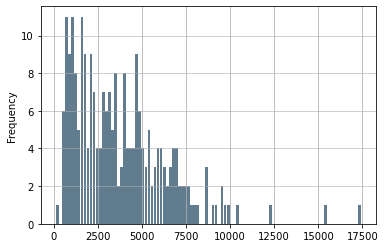

In [316]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = Yan_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [317]:
temp = Yan_post[(Yan_post['like_count'] <= 7500) & (Yan_post['like_count'] > 500)]
temp

,new_date,message,jieba_results,like_count,comment_count
2,2019-01-12,《上一次到溪邊玩是多久的事情了呢❓》\n\n💧鷺山坑溪，是龍井山腳里旁的一條小溪流，因為早年有大量的的白鷺鷥棲息，因而得名；除了白鷺鷥是一大特色，這裡的溪水來源，有一部分是少見的「湧泉」‼️\n\n🐟因為這裡生態豐富，水質清澈，在假日許多鄉親會在溪邊戲水，因此寬恒也向市府爭取建置「親水公園」，讓大家能夠有機會看到我們鷺山坑溪的豐富生態💪🏻💪🏻💪🏻\n\n✅但因為過去每逢大雨常有土石災害發生，為防止洪氾災害，寬恒向市府要求必須針對河道進行清淤、護岸進行整建已及增加截水溝🚧\n\n#小時候下課就是跑去溪邊玩水\n#鷺山坑溪,《 上 一次 到溪邊 玩 是 多久 的 事情 了 呢 ❓ 💧 鷺 山坑 溪 是 龍井 山腳里 旁 的 一條 小溪流 因為 早年 有 大量 的 的 白鷺鷥 棲息 因而 得名 除了 白鷺鷥 是 一大 特色 這裡 的 溪水 來源 有 一部分 是 少見 的 湧泉 ‼ ️ 🐟 因為 這裡 生態 豐富 水質 清澈 在 假日 許多 鄉親 會 在 溪邊 戲水 因此 寬恒 也 向 市府 爭取 建置 親水公園 讓 大家 能夠 有 機會 看到 我們 鷺 山坑 溪 的 豐富 生態 🏻 🏻 🏻 ✅ 但 因為 過去 每逢 大雨 常有 土石 災害 發生 為 防止 洪 氾 災害 寬恒 向 市府 要求 必須 針對 河道 進行 清淤 護岸 進行 整建 已及 增加 截水溝 🚧 小時候 下課 就是 跑 去 溪邊 玩水 鷺 山坑 溪,509,10
3,2019-04-11,📣台水公司停水通知📣\n為緊急搶修原水管線閥類設備漏水\n臺中市部分地區，請各位鄉親注意家中抽水馬達屆時必須關閉，以免造成空轉損壞‼️\n#4月12日晚間10時起停水23小時 \n🔊請大家事先儲水備用,📣 台水 公司 停水通知 📣 為 緊急 搶 修原 水管 線閥 類設備 漏水 臺中市 部分 地區 請 各位 鄉親 注意 家中 抽水 馬 達屆 時 必須 關閉 以免 造成 空轉 損壞 ‼ ️ 月 日 晚間 時起 停水 小時 🔊 請 大家 事先 儲水備 用,514,27
4,2019-07-19,《💧停水公告》\n\n⚠️因自來水公司第四區處於108年7月24日辦理「太平區配合水利局中和街雨水下水道管線遷移工程」，部分地區必須停水施工，停水時間為108年7月24日上午9時起至108年7月25日上午8時止，計23小時。\n\n⚠️在停水、減壓供水範圍內的鄉親朋友務必儲水備用，水公司也設置了24處民生用水臨時取水站，詳細停水、降壓區域及取水站地址可至自來水公司網站查詢。\n\n【停水區域】\n太平區：東平里、東和里、聖和里、頭汴里、東汴里、福隆里、興隆里、光隆里、永隆里、成功里、建興里。\n大里區：健民里。\n\n【降壓區域】\n太平區：德隆里、中興里、永平里、成功里、建國里、中平里、中政里、平安里、太平里、永成里、長億里、光隆里、永隆里。\n大里區：新仁里、立仁里、立德里、仁化里、仁德里、健民里、金城里、瑞城里、塗城里。\n霧峰區：桐林里、吉峰里。\n\n網址：https://www4.water.gov.tw\n\n#貼心提醒 #記得關馬達喔 #節約用水💧,《 💧 停水 公告 ⚠ ️ 因自來 水 公司 第四 區處 於 年 月 日 辦理 太平 區 配合 水利局 中 和 街 雨水 下水道 管線 遷移 工程 部分 地區 必須 停水 施工 停水 時間 為 年 月 日 上午 時起 至 年 月 日 上午 時止 計 小時 ⚠ ️ 在 停水 減壓 供水 範圍 內 的 鄉親 朋友 務必 儲水備 用 水 公司 也 設置 了 處 民生 用水 臨時 取水 站 詳細 停水 降壓 區域 及 取水 站 地址 可至 自來 水 公司 網站 查詢 停水 區域 太平 區 東平里 東和里 聖和里 頭汴里 東汴里 福隆 里 興隆里 光隆里 永隆 里 成功 里 建興里 大里區 健民 里 降壓 區域 太平 區 德隆 里 中興里 永平 里 成功 里 建國里 中平 里 中政里 平安里 太平 里 永成 里 長 億里 光隆里 永隆 里 大里區 新仁里 立仁里 立 德里 仁化 里 仁德 里 健民 里 金 城里 瑞 城里 塗 城里 霧峰區 桐林 里 吉峰 里 網址 / / 貼心 提醒 記得 關馬達 喔 節約 用水 💧,565,9
5,2019-08-28,《「禽獸說」主委陳明通再出招》\n\n旅遊業者27日赴立法院陳情，有業者評估將會減少70萬名陸客，損失300億元。陸委會主委陳明通說，面對目前情勢，政府有誠意助業者度難關，但也批評陸方，一直把開放旅遊當作是「政策工具」，但這些風險，政府早有評估和準備。觀光局也表示，不管陸方怎麼干擾大陸來台旅遊市場，會跟業者站在一起，帶領業者盡力衝刺。\n\n先前說求溫飽跟禽獸沒兩樣，現在旅遊業面臨寒冬，大言不慚說要帶業者一起衝？\n\n我想要告訴陳明通主委，你領國家高薪擔任的是陸委會主委，不是嘴砲技術士，從就職到現在到底貢獻了甚麼？就算大陸出招要窮台，你也要想辦法斡旋回來，這不就是你的工作嗎？整天當蔡英文的應聲蟲，開會時又裝得吊兒郎噹的，台中人的臉都給你丟光了(握拳)！\n\n我前天去換輪胎，老闆說「旅遊業蕭條，連我換輪胎的也有影響欸，連隔壁那間遊覽車的修配廠都有影響欸，難道到時候政府還要補助換輪胎嗎？換機油嗎？」\n\n領高薪除了喊話叫囂、停止對話溝通，一旦遇到各行各業蕭條就補助狂撇錢，蔡政府真的沒招了嗎？\n\n🔗新聞連結：https://video.udn.com/news/1133182\n\n#陳明通 #禽獸說 #陸客,《 禽獸 說 主委 陳明通 再 出招 旅遊業者 日 赴 立法院 陳 情 有業者 評估 將會 減少 萬名 陸客 損失 億元 陸委會 主委 陳明通 說 面對 目前 情勢 政府 有誠意 助業者度 難關 但 也 批評 陸方 一直 把 開放 旅遊 當作 是 政策 工具 但 這些 風險 政府 早有 評估 和 準備 觀光局 也 表示 不管 陸方 怎麼 干擾 大陸來 台 旅遊 市場 會 跟業者 站 在 一起 帶 領業者 盡力 衝刺 先前 說求 溫飽 跟 禽獸 沒 兩樣 現在 旅遊業 面臨 寒冬 大言 不慚 說 要 帶業者 一起 衝 我 想要 告訴 陳明通 主委 你領 國家 高薪 擔任 的 是 陸委會 主委 不是 嘴 砲 技術士 從 就 職到 現在 到底 貢獻 了 甚麼 就算 大陸出 招要 窮台 你 也 要 想 辦法 斡旋 回來 這不 就是 你 的 工作 嗎 整天 當 蔡英文 的 應聲蟲 開會 時 又 裝得 吊兒 郎 噹 的 台中人 的 臉都給 你 丟光 了 握拳 我 前天 去 換輪胎 老 闆 說 旅遊業 蕭條 連我換 輪胎 的 也 有 影響 欸 連 隔壁 那間 遊覽車 的 修配 廠 都 有 影響 欸 難道 到 時候 政府 還要 補助 換輪胎 嗎 換機油 嗎 領 高薪 除了 喊話 叫囂 停止 對話 溝通 一旦 遇到 各行 各業 蕭條 就 補助 狂撇錢 蔡 政府 真的 沒招 了 嗎 🔗 新聞 連結 / / / / 陳明通 禽獸 說 陸客,572,75
6,2019-02-21,💡老一輩的人對霧峰的直接聯想是省議會，年輕一輩的或許會想到光復新村的文創區，但大家知道霧峰盛產水果同時也是香米的故鄉嗎❓\n\n😋霧峰生產的梨、龍眼、荔枝、鳳梨、香蕉…等水果，品質優良、果實飽滿，改良與原生種共生，像是萊園山的土鳳梨🍍，甜中帶酸、風味十足，黑葉荔枝香味四溢，尤其👍🏻「益全香米」更是霧峰人引以為傲的重要農產品，霧峰也擔綱了全國最大香米種植地的重責大任，淡淡的芋香味更是根深蒂固地抓住大家的胃，其最大功臣就是培育出香米的「郭益全博士」💪🏻💪🏻💪🏻\n\n📣近年來，益全香米在各大米類競賽中屢展佳績，為了讓郭博士的心血讓國際看見，也讓鄉親用不同的方式品嘗益全香米的滋味，霧峰農會將益全香米、結合埔里山泉釀作清酒，第一名的米、加上第一名的水，造就了第一名的酒，取名為「初霧」。\n\n🍾這支酒拿過的國際賽金牌，比奧運游泳名將菲爾普斯還多，大家如果有機會到霧峰來，歡迎大家到霧峰酒莊來走走，一定會有許多收穫喔‼️\n\n📍地址：台中市霧峰區中正路345號\n\n#郭益全博士 #益全香米 #霧峰農會酒莊,💡 老一輩 的 人 對 霧峰 的 直接 聯想 是 省議 會 年輕 一輩 的 或 許會 想到 光 復 新村 的 文 創區 但 大家 知道 霧峰 盛產 水果 同時 也 是 香米 的 故鄉 嗎 ❓ 😋 霧峰 生產 的 梨 龍眼 荔枝 鳳梨 香蕉 等 水果 品質 優良 果實 飽滿 改良 與 原生 種 共生 像是 萊園 山 的 土鳳梨 🍍 甜中 帶酸 風 味十足 黑葉 荔枝 香味 四溢 尤其 👍 🏻 益全 香米 更是 霧峰 人 引以 為傲 的 重要 農產品 霧峰 也 擔綱 了 全國 最大 香米 種植地 的 重責大任 淡淡的 芋 香味 更是 根深蒂固 地 抓住 大家 的 胃 其 最大 功臣 就是 培育出 香米 的 郭益 全 博士 🏻 🏻 🏻 📣 近年 來 益全 香米 在 各 大米 類競賽 中 屢展 佳績 為 了 讓 郭 博士 的 心血 讓 國際 看見 也 讓 鄉親 用 不同 的 方式 品嘗益 全 香米 的 滋味 霧峰 農會 將益 全 香米 結合 埔里 山泉 釀作 清酒 第一名 的 米 加上 第一名 的 水 造就 了 第一名 的 酒 取名 為 初霧 🍾 這支 酒拿過 的 國際賽 金牌 比奧運 游泳 名將 菲爾普斯 還多 大家 如果 有 機

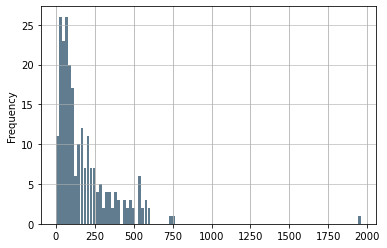

In [318]:
commutes = Yan_post['comment_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [319]:
temp = Yan_post[(Yan_post['comment_count'] <= 500) & (Yan_post['comment_count'] > 50)]
temp

,new_date,message,jieba_results,like_count,comment_count
5,2019-08-28,《「禽獸說」主委陳明通再出招》\n\n旅遊業者27日赴立法院陳情，有業者評估將會減少70萬名陸客，損失300億元。陸委會主委陳明通說，面對目前情勢，政府有誠意助業者度難關，但也批評陸方，一直把開放旅遊當作是「政策工具」，但這些風險，政府早有評估和準備。觀光局也表示，不管陸方怎麼干擾大陸來台旅遊市場，會跟業者站在一起，帶領業者盡力衝刺。\n\n先前說求溫飽跟禽獸沒兩樣，現在旅遊業面臨寒冬，大言不慚說要帶業者一起衝？\n\n我想要告訴陳明通主委，你領國家高薪擔任的是陸委會主委，不是嘴砲技術士，從就職到現在到底貢獻了甚麼？就算大陸出招要窮台，你也要想辦法斡旋回來，這不就是你的工作嗎？整天當蔡英文的應聲蟲，開會時又裝得吊兒郎噹的，台中人的臉都給你丟光了(握拳)！\n\n我前天去換輪胎，老闆說「旅遊業蕭條，連我換輪胎的也有影響欸，連隔壁那間遊覽車的修配廠都有影響欸，難道到時候政府還要補助換輪胎嗎？換機油嗎？」\n\n領高薪除了喊話叫囂、停止對話溝通，一旦遇到各行各業蕭條就補助狂撇錢，蔡政府真的沒招了嗎？\n\n🔗新聞連結：https://video.udn.com/news/1133182\n\n#陳明通 #禽獸說 #陸客,《 禽獸 說 主委 陳明通 再 出招 旅遊業者 日 赴 立法院 陳 情 有業者 評估 將會 減少 萬名 陸客 損失 億元 陸委會 主委 陳明通 說 面對 目前 情勢 政府 有誠意 助業者度 難關 但 也 批評 陸方 一直 把 開放 旅遊 當作 是 政策 工具 但 這些 風險 政府 早有 評估 和 準備 觀光局 也 表示 不管 陸方 怎麼 干擾 大陸來 台 旅遊 市場 會 跟業者 站 在 一起 帶 領業者 盡力 衝刺 先前 說求 溫飽 跟 禽獸 沒 兩樣 現在 旅遊業 面臨 寒冬 大言 不慚 說 要 帶業者 一起 衝 我 想要 告訴 陳明通 主委 你領 國家 高薪 擔任 的 是 陸委會 主委 不是 嘴 砲 技術士 從 就 職到 現在 到底 貢獻 了 甚麼 就算 大陸出 招要 窮台 你 也 要 想 辦法 斡旋 回來 這不 就是 你 的 工作 嗎 整天 當 蔡英文 的 應聲蟲 開會 時 又 裝得 吊兒 郎 噹 的 台中人 的 臉都給 你 丟光 了 握拳 我 前天 去 換輪胎 老 闆 說 旅遊業 蕭條 連我換 輪胎 的 也 有 影響 欸 連 隔壁 那間 遊覽車 的 修配 廠 都 有 影響 欸 難道 到 時候 政府 還要 補助 換輪胎 嗎 換機油 嗎 領 高薪 除了 喊話 叫囂 停止 對話 溝通 一旦 遇到 各行 各業 蕭條 就 補助 狂撇錢 蔡 政府 真的 沒招 了 嗎 🔗 新聞 連結 / / / / 陳明通 禽獸 說 陸客,572,75
10,2019-07-08,《一時綠一時爽，一直綠一直爽》\n\n📡報導中表示「✅繼台中市前建設局長黃玉霖接任交通部政務次長、✅台中市前水利局長周廷彰接任觀光局副局長、✅台中市前交通局長馮昇輝接任台鐵局副局長、✅台中市前勞工局長黃荷婷接任交通部參事、✅台中市前新聞局長卓冠廷接任部長辦公室主任後，✅台中市前副市長林陵三再接任中華顧問工程司董事長」\n\n⚠️外行的帶著一群狀況外的，去領導內行的，💧水利專業很懂觀光旅遊、🏗學土木工程很懂鐵路運輸、⛑勞工專業很懂交通政策，不如說是這些官員都很懂得黏著佳龍‼️\n\n👉🏻只能說「一人得道、飛龍在天」‼️\n\n🔗新聞連結：https://push.turnnewsapp.com/content/20190708000501-260110,《 一時 綠一時 爽 一直 綠一 直爽 📡 報導 中 表示 ✅ 繼 台中市 前建設 局長 黃 玉霖 接任 交通部 政務次 長 ✅ 台中市 前 水利局 長 周廷彰 接任 觀光局 副 局長 ✅ 台中市 前 交通局 長 馮昇輝 接任 台鐵局 副 局長 ✅ 台中市 前勞 工局 長 黃 荷婷 接任 交通部 參事 ✅ 台中市 前新聞 局長 卓冠廷 接任 部長 辦公 室主任 後 ✅ 台中市 前 副 市長 林陵 三 再 接任 中華顧問 工程 司 董事 長 ⚠ ️ 外行 的 帶 著 一群 狀況 外 的 去 領導 內行 的 💧 水利 專業 很 懂 觀光 旅遊 🏗 學 土木工程 很 懂 鐵路 運輸 ⛑ 勞工 專業 很 懂 交通 政策 不如 說 是 這些 官員 都 很 懂得 黏著佳龍 ‼ ️ 👉 🏻 只能 說 一人得道 飛龍 在 天 ‼ ️ 🔗 新聞 連結 / / / /,698,97
16,2019-03-19,NCC大家知道是什麼嗎❓\n\n📡國家通訊傳播委員會，是NCC的全銜，所謂「通訊傳播」大至整個國家的通信業、小至大家每天使用的通訊軟體，都是NCC的業務範圍；🤔但寬恒認為，政府現在卻只把NCC當作是處理假新聞的機關，況且NCC現在還要肩負推動5G業務的重責大任，這攸關未來物聯網和電訊發展的前景‼️\n\n蘇貞昌日前大罵NCC沒有作為，NCC作為我國少有的「獨立機關」，行政院長卻可以用這種上對下的階級來影響NCC，這樣「獨立性」何在呢❓\n\n說穿了NCC的委員都是由行政院提名，那何來的「獨立行使職權」呢❓\n\n😈假新聞的開山元老，用假新聞、假消息來影響選舉，以及善用「兩套標準」來判斷事情真偽的，我想大家都很明白是誰，寬恒質詢時也要求NCC未來能夠秉持「獨立行使職權」法定義務，勿枉勿縱，讓國人都能接收到正確的資訊，導正視聽‼️\n\n#交通委員會業務質詢 #NCC #假新聞,大家 知道 是 什麼 嗎 ❓ 📡 國家 通訊 傳播 委員 會 是 的 全銜 所謂 通訊 傳播 大至 整個 國家 的 通信 業 小至 大家 每天 使用 的 通訊 軟體 都 是 的 業務範圍 🤔 但 寬恒 認為 政府 現在 卻 只 把 當作 是 處理 假新聞 的 機關 況且 現在 還要 肩負 推動 業務 的 重責大任 這攸關 未來物 聯網 和 電訊 發展 的 前景 ‼ ️ 蘇貞昌 日前 大罵 沒有 作為 作為 我國 少有 的 獨立 機關 行政院 長 卻 可以 用 這種 上 對 下 的 階級 來 影響 這樣 獨立性 何在 呢 ❓ 說 穿 了 的 委員 都 是 由 行政院 提名 那何 來 的 獨立 行使 職權 呢 ❓ 😈 假新聞 的 開山 元老 用假 新聞 假消息 來 影響 選舉 以及 善用 兩套 標準 來判斷 事情 真偽 的 我 想 大家 都 很 明白 是 誰 寬恒 質詢 時 也 要求 未來 能夠 秉持 獨立 行使 職權 法定 義務 勿 枉 勿 縱 讓 國人 都 能 接收 到 正確 的 資訊 導正視 聽 ‼ ️ 交通 委員 會業務質詢 假新聞,798,75
19,2019-03-08,《💻網紅院長及網紅團隊》\n\n⚠️蘇貞昌院長敗選後接下閣揆，創下了被兩任不同總統任命的紀錄，所以上任後拼命當網紅、開直播，備詢直播、吃滷肉飯直播、看燈會直播，我們希望的是這樣的網紅院長嗎❓\n\n👉🏻當年任命陳水扁和現在的蔡英文，都有一個共同點，就是都是在民進黨聲勢最低迷的時候，今天寬恒質詢時，特別指出了✅蛋價飆漲、✅缺水、✅缺電導致萬物齊漲⋯等問題。\n\n🥚蛋價問題從去年823的水災，淹死了60萬隻蛋雞後，就能遇見，但偏偏政府就要等到供貨短缺時，才開始南蛋北送、進口雞蛋來急就章，電價問題亦同，明明知道能源政策會讓購電成本變高，漲價是必然的，但還是堅持錯誤的能源政策，然後一下放話說要漲價、一下遇到選舉又凍漲‼️\n\n💢此外，中部鄉親最關心的中火增加燃氣機組後，燃煤機組除役的問題，今天院長態度也是曖昧不明，一直說要作為「緊急備用」，萬一屆時綠能出了包、天然氣供應不穩定，緊急備用變成了常態，那中部民眾收到蔡政府送的大禮就是「十部燃煤+二部燃氣」‼️\n\n👿連蛋都搞不定，這政府還能指望些什麼❓\n\n#總質詢 #經濟組 #蛋價飆漲 #能源政策\n#電價調漲,《 💻 網紅院 長 及 網紅團隊 ⚠ ️ 蘇貞昌院 長 敗選 後 接下 閣揆 創下 了 被 兩任 不同 總統 任命 的 紀錄 所以 上任 後 拼命 當網紅 開 直播 備詢 直播 吃 滷 肉 飯 直播 看燈會 直播 我們 希望 的 是 這樣 的 網紅院 長 嗎 ❓ 👉 🏻 當年 任命 陳 水 扁和現 在 的 蔡英文 都 有 一個 共同 點 就是 都 是 在 民進黨 聲勢 最 低迷 的 時候 今天 寬恒 質詢 時 特別 指出 了 ✅ 蛋價 飆漲 ✅ 缺水 ✅ 缺電導致 萬物 齊漲 等 問題 🥚 蛋價 問題 從 去年 的 水災 淹死 了 萬 隻 蛋 雞 後 就 能 遇見 但 偏偏 政府 就要 等到 供貨 短缺 時 才 開始 南蛋北 送 進口 雞 蛋來 急就章 電價 問題 亦 同 明明 知道 能源 政策 會 讓 購電 成本 變高 漲價 是 必然 的 但 還是 堅持 錯誤 的 能源 政策 然 後 一下 放話 說 要 漲價 一下 遇到 選舉 又 凍漲 ‼ ️ 💢 此外 中部 鄉親 最關心 的 中火 增加 燃氣 機組 後 燃煤 機組 除役 的 問題 今天 院長 態度 也 是 曖昧 不明 一直 說要 作為 緊急備 用 萬一屆 時綠能 出 了 包 天然 氣供 應 不 穩定 緊急備 用 變成 了 常態 那 中部 民眾 收到 蔡 政府 送 的 大禮 就是 十部 燃煤 + 二部 燃氣 ‼ ️ 👿 連蛋 都 搞不定 這 政府 還能 指望 些 什麼 ❓ 總質詢 經濟組 蛋價 飆漲 能源 政策 電價 調漲,837,148
23,2019-03

TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [320]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [321]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [322]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一下,一些,一人,一人得道,一件,一份,一位,一來,一例,一個,...,龍津,龍津街,龍海國小,龍港路,龍目,龍眼,龍西,龍門,龍門路,龐大
0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.000000,0.0,0.097324,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.10036,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.05018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,0.00000,0.179614,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [323]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=4, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['朋友', '今天', '大橋', '努力', '感謝', '大家', '耕耘', '繼續', '鄉親', '寬恒']
TOP 10 WORDS PER TOPIC #1
['鄉親', '今天', '一起', '民進黨', '我們', '政府', '大家', '寬恒', '右轉', '左轉']
TOP 10 WORDS PER TOPIC #2
['連結', '交通', '我們', '問題', '今天', '政府', '交通部', '就是', '民進黨', '寬恒']
TOP 10 WORDS PER TOPIC #3
['顏寬恒', '大家', '早安', '龍井', '倒數', '我們', '沙鹿', '耕耘', '繼續', '寬恒']


In [324]:
LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['民調', '泰國', '耕耘', '鄉親', '加油', '今天', '酬庸', '夜市', '寬恒', '老師']
TOP 10 WORDS PER TOPIC #1
['倒數', '早安', '國旗', '民進黨', '龍井', '耕耘', '繼續', '寬恒', '右轉', '左轉']
TOP 10 WORDS PER TOPIC #2
['鄉親', '明天', '今天', '服務', '韓國瑜', '大家', '粽子', '公園', '我們', '寬恒']
TOP 10 WORDS PER TOPIC #3
['霧峰', '沙鹿', '顏寬恒', '烏日', '倒數', '大家', '寬恒', '耕耘', '繼續', '早安']


In [325]:
#政見做斷詞

politics_Yan = politics[politics.姓名 == "顏寬恒"].政見.to_string()
politics_Yan = re.sub(re_punctuation, "", politics_Yan)
politics_Yan = re.sub(r'[0-9]','',politics_Yan)
politics_Yan = re.sub(r'[a-zA-Z]','',politics_Yan)
politics_Yan = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗],...（），','',politics_Yan)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
politics_words = jieba.lcut(politics_Yan, cut_all = False)
print(words)

['《', '龍海國小', '舊校舍', '拆除', '重建', '，', '三', '「', '心', '」', '級', '的', '新', '校舍', '❤', '️', '》', '\n', '\n', '🏫', '創校', '已經', '43', '年', '的', '龍井', '區', '龍海國小', '，', '東西', '兩棟', '校舍', '已', '十分', '，', '老舊', '不堪', '使用', '，', '從', '「', '違樓', '評估', '」', '開始', '，', '寬恒', '就', '努力', '爭取', '協調', '‼', '️', '\n', '\n', '⚠', '️', '列為', '危樓', '後', '，', '寬恒', '向', '教育部', '與', '台中市政府', '前後共爭', '取', '了', '總經費', '1', '億', '2', ',', '874', '萬來', '進行', '重建', '工程', '🚧', '\n', '\n', '🏗', '昨天', '進行', '了', '動土', '典禮', '，', '將', '依序', '拆除', '東', '、', '西棟', '校舍', '，', '並興建', '✅', '地上', '4', '層樓', '校舍', '、', '✅', '非營利', '幼兒園', '及', '✅', '活動', '中心', '，', '讓', '學校', '的', '空間', '發揮', '到極', '大化', '，', '也', '讓', '附近', '的', '鄉親', '同時', '能夠', '享受', '到', '學校', '的', '設施', '💪', '🏻', '\n', '\n', '🙏', '感謝', '一路上', '幫忙', '的', '議員', '、', '里長', '和', '學校', '師長', '，', '師長', '用心', '、', '孩子', '開心', '、', '家長', '安心', '，', '寬恒', '會', '繼續', '努力', '打造', '孩子', '們', '優質', '的', '學習', '環境', '❤', '️', '\n', '\n', '#', '龍海國小', '校舍', '改建', '\

In [326]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_Yan, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)

In [327]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(words)  
word = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=5, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [p_vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)

TOP 10 WORDS PER TOPIC #0
['鄉親', '同時', '改建', '已經', '昨天', '地上', '安心', '進行', '家長', '校舍']
TOP 10 WORDS PER TOPIC #1
['使用', '工程', '空間', '不堪', '西棟', '大化', '層樓', '重建', '孩子', '學校']
TOP 10 WORDS PER TOPIC #2
['危樓', '活動', '發揮', '創校', '幫忙', '老舊', '爭取', '幼兒園', '努力', '龍海國小']
TOP 10 WORDS PER TOPIC #3
['舊校舍', '協調', '開始', '列為', '里長', '拆除', '用心', '開心', '師長', '寬恒']
TOP 10 WORDS PER TOPIC #4
['總經費', '典禮', '優質', '打造', '一路上', '兩棟', '學習', '非營利', '到極', '繼續']


In [328]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

鄉親, 同時, 改建, 已經, 昨天, 地上, 安心, 進行, 家長, 校舍, 使用, 工程, 空間, 不堪, 西棟, 大化, 層樓, 重建, 孩子, 學校, 危樓, 活動, 發揮, 創校, 幫忙, 老舊, 爭取, 幼兒園, 努力, 龍海國小, 舊校舍, 協調, 開始, 列為, 里長, 拆除, 用心, 開心, 師長, 寬恒, 總經費, 典禮, 優質, 打造, 一路上, 兩棟, 學習, 非營利, 到極, 繼續, 

In [329]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#排水問題、鐵路高架工程、長照、台中港、媽祖

Counter({'鄉親': 3,
         '同時': 1,
         '改建': 1,
         '已經': 1,
         '昨天': 1,
         '地上': 1,
         '安心': 1,
         '進行': 1,
         '家長': 1,
         '校舍': 1,
         '使用': 1,
         '工程': 1,
         '空間': 1,
         '不堪': 1,
         '西棟': 1,
         '大化': 1,
         '層樓': 1,
         '重建': 1,
         '孩子': 1,
         '學校': 1,
         '危樓': 1,
         '活動': 1,
         '發揮': 1,
         '創校': 1,
         '幫忙': 1,
         '老舊': 1,
         '爭取': 1,
         '幼兒園': 1,
         '努力': 2,
         '龍海國小': 1,
         '舊校舍': 1,
         '協調': 1,
         '開始': 1,
         '列為': 1,
         '里長': 1,
         '拆除': 1,
         '用心': 1,
         '開心': 1,
         '師長': 1,
         '寬恒': 5,
         '總經費': 1,
         '典禮': 1,
         '優質': 1,
         '打造': 1,
         '一路上': 1,
         '兩棟': 1,
         '學習': 1,
         '非營利': 1,
         '到極': 1,
         '繼續': 3,
         '朋友': 1,
         '今天': 3,
         '大橋': 1,
         '感謝': 1,
         '大家': 3,
   

In [330]:
top_10_message = tfidf_view.sort_values(by = ['台中港'], ascending = False).index[:10] # 把台中港tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['台中港'], ascending = False).head(10)

,一下,一些,一人,一人得道,一件,一份,一位,一來,一例,一個,...,龍津,龍津街,龍海國小,龍港路,龍目,龍眼,龍西,龍門,龍門路,龐大
76,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
113,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
109,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
110,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022142,0.0,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
115,0.0,0.0,0.0,0.0,0.0,0.0,0.086644,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [331]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"台中港"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[115,]).sort_values(by = 115, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,115
和美大橋,0.311510
彰化,0.224246
提出,0.193041
大肚,0.188561
提案,0.187204
...,...
小腸,0.000000
小細節,0.000000
小朋友,0.000000
小時,0.000000


In [332]:
top_10_message = tfidf_view.sort_values(by = ['媽祖'], ascending = False).index[:10] # 把台中港tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['媽祖'], ascending = False).head(10)

,一下,一些,一人,一人得道,一件,一份,一位,一來,一例,一個,...,龍津,龍津街,龍海國小,龍港路,龍目,龍眼,龍西,龍門,龍門路,龐大
34,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
63,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.130472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
133,0.000000,0.0,0.0,0.0,0.0,0.079895,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
118,0.074023,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
110,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022142,0.0,0.0
111,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
112,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
113,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
114,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
115,0.000000,0.0,0.0,0.0,0.0,0.000000,0.086644,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [333]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

151      下課
152      左轉
153      市區
154      收工
155      霧峰
156      吉祥
157      大雨
158      上課
159      朱市
160      更好
161    告一段落
162      國旗
163      陪您
164      霧峰
165      一下
166      烏日
167      寬恒
168      初心
169      口水
170      代替
Name: term, dtype: object

In [334]:
#假如以剛剛科學園區相關主題為例 想看tfidf 最高的詞是科學園區的文章
message_newtfidf[message_newtfidf['term']=="沙鹿"]

,一下,一些,一人,一人得道,一件,一份,一位,一來,一例,一個,...,龍津街,龍海國小,龍港路,龍目,龍眼,龍西,龍門,龍門路,龐大,term
35,0.0,0.090985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,沙鹿


In [335]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[35,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                      2020-01-08
message                                                                                                            《繼續耕耘💪🏻沙鹿建設篇》\n\n沙鹿，是早期生活在大肚山下平原區「拍瀑拉族」的族語譯音，古稱「沙轆」。\n\n😅有一些可愛的小朋友看到有個「鹿🦌」字，就會問說「那以前這邊有鹿嗎？」\n\n「有的」，以成衣聞名的「鹿寮」過去就是獵人狩獵山鹿、搭建簡單寮舍而逐漸形成的聚落🏡\n\n🏠沙鹿，也是我的故鄉，除了求學時曾經短暫離開外，我不曾離開過；所以我很了解地方的發展需求和歷史進程。\n\n交通、治水、特定區解編還地於民⋯等，都是寬恒努力的方向，而也在大家的協助下，這些建設與計畫也都逐一完成，也因此帶動地方發展，吸引外來人口移入，所以沙鹿的人口越來越多，現在已經超過9萬4千多人。\n\n「謝謝沙鹿陪著我們長大，未來換我們一起陪著沙鹿繼續成長茁壯。」\n\n#繼續耕耘 #沙鹿建設篇
jieba_results     《 繼續 耕耘  🏻 沙鹿 建設 篇 沙鹿 是 早期 生活 在 大肚山 下 平原 區 拍 瀑拉族 的 族 語譯音 古稱 沙轆  😅 有 

In [336]:
message_newtfidf[message_newtfidf['term']=="烏日"]

,一下,一些,一人,一人得道,一件,一份,一位,一來,一例,一個,...,龍津街,龍海國小,龍港路,龍目,龍眼,龍西,龍門,龍門路,龐大,term
45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,烏日
137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,烏日
140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,烏日
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,烏日


In [337]:
temp.iloc[[45,137,140,166],2]

95      《 繼續 耕耘  🏻 烏日 建設 篇 頂 朥 喀哩 下 朥 胥 番仔 園  ❓ 先 把 黑人 問號 收回 去 因為 不是 在 地人 一定 都 一頭 霧 水 上面 分別 是 烏日 ✅ 三和里 ✅ 南里 里 及 北里 里 ✅ 榮泉里 ✅ 東園 里 都 是 早期 平埔族 的 譯音 但 到 現在 我們 還是 常常 用 舊名 稱呼 除了 習慣 以外 似乎 也 多 了 份家 的 感覺  🌾 烏日 早期 以 農業 為主 但現 在 以大里 溪 為界 分為 溪南 和 溪北 溪北 以 工商 業為 主 高鐵特區 也 在 廣泛 的 溪北 地區 溪南 仍 扮演 烏日 的 大 穀 倉  🏻 💧 因為 烏日 的 河川 非常 多 淹水 及 防汛 問題 一直 是 寬恒 加強 的 重點 而 隨著台 鐵 高鐵 捷運三鐵 的 注入 烏日 人口 急速 成長 光是 九 德里 人口 數就 高達  人 因此 更 多 的 交通 民生 問題 接踵而至 寬恒 也 配合 地方 發展 鄉親 需求 努力 爭取 建設  當 地方 有 迫切 需求 的 時候 第一 時間 想到 的 絕對 不是 選舉 而是 如何 幫 鄉親 解決 問題 少一點 政治 味 就 會 多 一點 人情味 ❤ ️  繼續 耕耘    倒數  天
189                                                                                                                                                                                                                                                                                                                                                                                                                                                               👋 🏻 早安 烏日

In [338]:
message_newtfidf[message_newtfidf['term']=="和美大橋"]

,一下,一些,一人,一人得道,一件,一份,一位,一來,一例,一個,...,龍津街,龍海國小,龍港路,龍目,龍眼,龍西,龍門,龍門路,龐大,term
115,0.0,0.0,0.0,0.0,0.0,0.0,0.086644,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,和美大橋


In [339]:
temp.iloc[115,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      2019-12-13
message                                                                                                                                                                                    《眾所期盼的和美大橋💪🏻》\n\n✅大肚和彰化和美鎮，因為烏溪而分隔兩地，因此鄉親必須繞道而行，明明看到國道就在旁邊，卻必須繞一大圈才能接上高速公路；所以在寬恒甫擔任立委後，在立法院提出了和美大橋的提案，但礙於前台中市長林佳龍與前彰化縣長魏明谷遲遲未提出計畫，所以延宕至今。\n\n👍🏻在台中市盧秀燕市長和彰化縣王惠美縣長上任後

In [340]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['民調', '泰國', '耕耘', '鄉親', '加油', '今天', '酬庸', '夜市', '寬恒', '老師']
TOP 10 WORDS PER TOPIC #1
['倒數', '早安', '國旗', '民進黨', '龍井', '耕耘', '繼續', '寬恒', '右轉', '左轉']
TOP 10 WORDS PER TOPIC #2
['鄉親', '明天', '今天', '服務', '韓國瑜', '大家', '粽子', '公園', '我們', '寬恒']
TOP 10 WORDS PER TOPIC #3
['霧峰', '沙鹿', '顏寬恒', '烏日', '倒數', '大家', '寬恒', '耕耘', '繼續', '早安']


In [341]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
5,2019-08-28,《 禽獸 說 主委 陳明通 再 出招 旅遊業者 日 赴 立法院 陳 情 有業者 評估 將會 減少 萬名 陸客 損失 億元 陸委會 主委 陳明通 說 面對 目前 情勢 政府 有誠意 助業者度 難關 但 也 批評 陸方 一直 把 開放 旅遊 當作 是 政策 工具 但 這些 風險 政府 早有 評估 和 準備 觀光局 也 表示 不管 陸方 怎麼 干擾 大陸來 台 旅遊 市場 會 跟業者 站 在 一起 帶 領業者 盡力 衝刺 先前 說求 溫飽 跟 禽獸 沒 兩樣 現在 旅遊業 面臨 寒冬 大言 不慚 說 要 帶業者 一起 衝 我 想要 告訴 陳明通 主委 你領 國家 高薪 擔任 的 是 陸委會 主委 不是 嘴 砲 技術士 從 就 職到 現在 到底 貢獻 了 甚麼 就算 大陸出 招要 窮台 你 也 要 想 辦法 斡旋 回來 這不 就是 你 的 工作 嗎 整天 當 蔡英文 的 應聲蟲 開會 時 又 裝得 吊兒 郎 噹 的 台中人 的 臉都給 你 丟光 了 握拳 我 前天 去 換輪胎 老 闆 說 旅遊業 蕭條 連我換 輪胎 的 也 有 影響 欸 連 隔壁 那間 遊覽車 的 修配 廠 都 有 影響 欸 難道 到 時候 政府 還要 補助 換輪胎 嗎 換機油 嗎 領 高薪 除了 喊話 叫囂 停止 對話 溝通 一旦 遇到 各行 各業 蕭條 就 補助 狂撇錢 蔡 政府 真的 沒招 了 嗎 🔗 新聞 連結 / / / / 陳明通 禽獸 說 陸客
10,2019-07-08,《 一時 綠一時 爽 一直 綠一 直爽 📡 報導 中 表示 ✅ 繼 台中市 前建設 局長 黃 玉霖 接任 交通部 政務次 長 ✅ 台中市 前 水利局 長 周廷彰 接任 觀光局 副 局長 ✅ 台中市 前 交通局 長 馮昇輝 接任 台鐵局 副 局長 ✅ 台中市 前勞 工局 長 黃 荷婷 接任 交通部 參事 ✅ 台中市 前新聞 局長 卓冠廷 接任 部長 辦公 室主任 後 ✅ 台中市 前 副 市長 林陵 三 再 接任 中華顧問 工程 司 董事 長 ⚠ ️ 外行 的 帶 著 一群 狀況 外 的 去 領導 內行 的 💧 水利 專業 很 懂 觀光 旅遊 🏗 學 土木工程 很 懂 鐵路 運輸 ⛑ 勞工 專業 很 懂 交通 政策 不如 說 是 這些 官員 都 很 懂得 黏著佳龍 ‼ ️ 👉 🏻 只能 說 一人得道 飛龍 在 天 ‼ ️ 🔗 新聞 連結 / / / /
16,2019-03-19,大家 知道 是 什麼 嗎 ❓ 📡 國家 通訊 傳播 委員 會 是 的 全銜 所謂 通訊 傳播 大至 整個 國家 的 通信 業 小至 大家 每天 使用 的 通訊 軟體 都 是 的 業務範圍 🤔 但 寬恒 認為 政府 現在 卻 只 把 當作 是 處理 假新聞 的 機關 況且 現在 還要 肩負 推動 業務 的 重責大任 這攸關 未來物 聯網 和 電訊 發展 的 前景 ‼ ️ 蘇貞昌 日前 大罵 沒有 作為 作為 我國 少有 的 獨立 機關 行政院 長 卻 可以 用 這種 上 對 下 的 階級 來 影響 這樣 獨立性 何在 呢 ❓ 說 穿 了 的 委員 都 是 由 行政院 提名 那何 來 的 獨立 行使 職權 呢 ❓ 😈 假新聞 的 開山 元老 用假 新聞 假消息 來 影響 選舉 以及 善用 兩套 標準 來判斷 事情 真偽 的 我 想 大家 都 很 明白 是 誰 寬恒 質詢 時 也 要求 未來 能夠 秉持 獨立 行使 職權 法定 義務 勿 枉 勿 縱 讓 國人 都 能 接收 到 正確 的 資訊 導正視 聽 ‼ ️ 交通 委員 會業務質詢 假新聞
19,2019-03-08,《 💻 網紅院 長 及 網紅團隊 ⚠ ️ 蘇貞昌院 長 敗選 後 接下 閣揆 創下 了 被 兩任 不同 總統 任命 的 紀錄 所以 上任 後 拼命 當網紅 開 直播 備詢 直播 吃 滷 肉 飯 直播 看燈會 直播 我們 希望 的 是 這樣 的 網紅院 長 嗎 ❓ 👉 🏻 當年 任命 陳 水 扁和現 在 的 蔡英文 都 有 一個 共同 點 就是 都 是 在 民進黨 聲勢 最 低迷 的 時候 今天 寬恒 質詢 時 特別 指出 了 ✅ 蛋價 飆漲 ✅ 缺水 ✅ 缺電導致 萬物 齊漲 等 問題 🥚 蛋價 問題 從 去年 的 水災 淹死 了 萬 隻 蛋 雞 後 就 能 遇見 但 偏偏 政府 就要 等到 供貨 短缺 時 才 開始 南蛋北 送 進口 雞 蛋來 急就章 電價 問題 亦 同 明明 知道 能源 政策 會 讓 購電 成本 變高 漲價 是 必然 的 但 還是 堅持 錯誤 的 能源 政策 然 後 一下 放話 說 要 漲價 一下 遇到 選舉 又 凍漲 ‼ ️ 💢 此外 中部 鄉親 最關心 的 中火 增加 燃氣 機組 後 燃煤 機組 除役 的 問題 今天 院長 態度 也 是 曖昧 不明 一直 說要 作為 緊急備 用 萬一屆 時綠能 出 了 包 天然 氣供 應 不 穩定 緊急備 用 變成 了 常態 那 中部 民眾 收到 蔡 政府 送 的 大禮 就是 十部 燃煤 + 二部 燃氣 ‼ ️ 👿 連蛋 都 搞不定 這 政府 還能 指望 些 什麼 ❓ 總質詢 經濟組 蛋價 飆漲 能源 政策 電價 調漲
23,2019-03-12,⚠ ️ 針對 交通 議題 寬恒 主張 💢 酒駕 跟 💢 毒駕 都 要 重罰 還有 鄉親 所關心 的 ✅ 生活圈 號 道路 大 肚 路段 蘇院長 都 承諾要 配合 辦理 歡迎 大家 點閱 影片 來 看看 今天 寬恒 到底 問了些 什麼 蘇院長 又 答應 了 什麼 🏻 🏻 🏻 總質詢 交通 組 大肚 生活圈 四號線 酒駕 毒駕
...,...,...
224,2019-12-07,《 謝謝 妳 烏日 年 的 立法 委員 補選舉 寬恒 在 烏日 輸 了 票 年 的 立委 選舉 寬恒 在 烏日 輸 了 票 烏日 是 選區 內極 其 艱困 的 區域 但 我們 的 服務 用心 絕不亞 於 其他 地方 在 連任 第二 屆 雖然 還是 有 挫折 但是 也 讓 一千多 位 鄉親 扭轉 投票 決定 這是 告訴 寬恒 我們 的 努力 鄉親 感受 到 了 而且 還要 再 加強 因此 對 於 烏日 的 服務 與 建設 不論 是 河川 整治 解決 淹水 問題 還有 台鐵 高架 化 溪尾 大橋 跨河 大橋 及其 延伸段 的 興建 等 大家 都 看 得到 而且 都 是 現在 進行式 寬恒 始終 不敢 鬆 懈 因為 沒有 最好 只有 更好 唯有 繼續 耕耘 努力 打拼 一點 一滴 爭取 鄉親 的 認同 這樣 才 是 紮 紮 實實 的 成果 最後要 感謝 所有 參與 的 鄉親 朋友 感謝 無私 奉獻 的 志 工夥伴 因為 有 您 讓 寬恒 更 有 力量 倒數 天 繼續 耕耘 烏日 競選總部
227,2019-11-23,《 感謝 您 的 蒞臨 再給 寬恒 一次 繼續 耕耘 的 機會 上午 寬恒 的 總部 成立大會 在 所有 鄉親 好友 的 支持 和 服務 團隊 與 志工 努力 下 圓滿 成功 民進黨 執政 四年 每天 喊 拼經濟 拼 的 都 是 他們 政黨 與 個 人 利益 但是 人民 呢 口惠 而 實不至 寬恒 這次 選擇 繼續 耕耘 當競選 標語 就是 認為 地方 經營 要 像 栽種 秧苗 一樣 民意代表 一出 門 就 像 在 田間 巡頭 看尾 只有 腳踏實 地 的 澆水 施肥 讓 鄉親 看 得到 找 得到 才能 夠聽 見 基層 的 聲音 並將 心聲 帶進 立法院 耕耘 沒撇步 只有 腳踏實 地 默默 做 骨力 行 讓 寬恒 為 大家 繼續 來 打拼 寬恒 用 最 真 誠 的 心 懇求 各位 鄉親 朋友 明年 / 將您 手中 神聖寶貴 的 一票 投給 認真 努力 在 地 的 寬恒 讓 寬恒 繼續 在 立法院 為 大家 推動 建設 爭取 福利 繼續 耕耘
228,2020-01-04,《 繼續 耕耘 🏻 從政 的 初心 ❤ ️ 只要 心 在 這裡 就 會 投入 在 這裡 過去 我 不曾 離開 未來 一樣 一直 會 在 🏠 因為 我 的 初心 就是 要 讓 你 過得 更好 👍 🏻 繼續 耕耘 從政 的 初心
233,2019-11-25,《 衝刺 寬恒 的 建設 成績 單 選戰 倒數 天 寬恒 要 告訴 所有 鄉親 朋友 寬恒 這 四年 來 的 努力 絕非口 說 無 憑 都 是 紮 紮 實實 的 成果 政治 很 簡單 少 一些 口水 影射 栽贓 抹黑 多一點 汗水 努力 做 就 對 了 只有 汗水 沒有 口水 繼續 耕耘


In [342]:
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-342-3ae45ac64bdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
C:\Users\Alice\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,comment_count,topic
5,2019-08-28,《「禽獸說」主委陳明通再出招》\n\n旅遊業者27日赴立法院陳情，有業者評估將會減少70萬名陸客，損失300億元。陸委會主委陳明通說，面對目前情勢，政府有誠意助業者度難關，但也批評陸方，一直把開放旅遊當作是「政策工具」，但這些風險，政府早有評估和準備。觀光局也表示，不管陸方怎麼干擾大陸來台旅遊市場，會跟業者站在一起，帶領業者盡力衝刺。\n\n先前說求溫飽跟禽獸沒兩樣，現在旅遊業面臨寒冬，大言不慚說要帶業者一起衝？\n\n我想要告訴陳明通主委，你領國家高薪擔任的是陸委會主委，不是嘴砲技術士，從就職到現在到底貢獻了甚麼？就算大陸出招要窮台，你也要想辦法斡旋回來，這不就是你的工作嗎？整天當蔡英文的應聲蟲，開會時又裝得吊兒郎噹的，台中人的臉都給你丟光了(握拳)！\n\n我前天去換輪胎，老闆說「旅遊業蕭條，連我換輪胎的也有影響欸，連隔壁那間遊覽車的修配廠都有影響欸，難道到時候政府還要補助換輪胎嗎？換機油嗎？」\n\n領高薪除了喊話叫囂、停止對話溝通，一旦遇到各行各業蕭條就補助狂撇錢，蔡政府真的沒招了嗎？\n\n🔗新聞連結：https://video.udn.com/news/1133182\n\n#陳明通 #禽獸說 #陸客,《 禽獸 說 主委 陳明通 再 出招 旅遊業者 日 赴 立法院 陳 情 有業者 評估 將會 減少 萬名 陸客 損失 億元 陸委會 主委 陳明通 說 面對 目前 情勢 政府 有誠意 助業者度 難關 但 也 批評 陸方 一直 把 開放 旅遊 當作 是 政策 工具 但 這些 風險 政府 早有 評估 和 準備 觀光局 也 表示 不管 陸方 怎麼 干擾 大陸來 台 旅遊 市場 會 跟業者 站 在 一起 帶 領業者 盡力 衝刺 先前 說求 溫飽 跟 禽獸 沒 兩樣 現在 旅遊業 面臨 寒冬 大言 不慚 說 要 帶業者 一起 衝 我 想要 告訴 陳明通 主委 你領 國家 高薪 擔任 的 是 陸委會 主委 不是 嘴 砲 技術士 從 就 職到 現在 到底 貢獻 了 甚麼 就算 大陸出 招要 窮台 你 也 要 想 辦法 斡旋 回來 這不 就是 你 的 工作 嗎 整天 當 蔡英文 的 應聲蟲 開會 時 又 裝得 吊兒 郎 噹 的 台中人 的 臉都給 你 丟光 了 握拳 我 前天 去 換輪胎 老 闆 說 旅遊業 蕭條 連我換 輪胎 的 也 有 影響 欸 連 隔壁 那間 遊覽車 的 修配 廠 都 有 影響 欸 難道 到 時候 政府 還要 補助 換輪胎 嗎 換機油 嗎 領 高薪 除了 喊話 叫囂 停止 對話 溝通 一旦 遇到 各行 各業 蕭條 就 補助 狂撇錢 蔡 政府 真的 沒招 了 嗎 🔗 新聞 連結 / / / / 陳明通 禽獸 說 陸客,572,0,
10,2019-07-08,《一時綠一時爽，一直綠一直爽》\n\n📡報導中表示「✅繼台中市前建設局長黃玉霖接任交通部政務次長、✅台中市前水利局長周廷彰接任觀光局副局長、✅台中市前交通局長馮昇輝接任台鐵局副局長、✅台中市前勞工局長黃荷婷接任交通部參事、✅台中市前新聞局長卓冠廷接任部長辦公室主任後，✅台中市前副市長林陵三再接任中華顧問工程司董事長」\n\n⚠️外行的帶著一群狀況外的，去領導內行的，💧水利專業很懂觀光旅遊、🏗學土木工程很懂鐵路運輸、⛑勞工專業很懂交通政策，不如說是這些官員都很懂得黏著佳龍‼️\n\n👉🏻只能說「一人得道、飛龍在天」‼️\n\n🔗新聞連結：https://push.turnnewsapp.com/content/20190708000501-260110,《 一時 綠一時 爽 一直 綠一 直爽 📡 報導 中 表示 ✅ 繼 台中市 前建設 局長 黃 玉霖 接任 交通部 政務次 長 ✅ 台中市 前 水利局 長 周廷彰 接任 觀光局 副 局長 ✅ 台中市 前 交通局 長 馮昇輝 接任 台鐵局 副 局長 ✅ 台中市 前勞 工局 長 黃 荷婷 接任 交通部 參事 ✅ 台中市 前新聞 局長 卓冠廷 接任 部長 辦公 室主任 後 ✅ 台中市 前 副 市長 林陵 三 再 接任 中華顧問 工程 司 董事 長 ⚠ ️ 外行 的 帶 著 一群 狀況 外 的 去 領導 內行 的 💧 水利 專業 很 懂 觀光 旅遊 🏗 學 土木工程 很 懂 鐵路 運輸 ⛑ 勞工 專業 很 懂 交通 政策 不如 說 是 這些 官員 都 很 懂得 黏著佳龍 ‼ ️ 👉 🏻 只能 說 一人得道 飛龍 在 天 ‼ ️ 🔗 新聞 連結 / / / /,698,3,
16,2019-03-19,NCC大家知道是什麼嗎❓\n\n📡國家通訊傳播委員會，是NCC的全銜，所謂「通訊傳播」大至整個國家的通信業、小至大家每天使用的通訊軟體，都是NCC的業務範圍；🤔但寬恒認為，政府現在卻只把NCC當作是處理假新聞的機關，況且NCC現在還要肩負推動5G業務的重責大任，這攸關未來物聯網和電訊發展的前景‼️\n\n蘇貞昌日前大罵NCC沒有作為，NCC作為我國少有的「獨立機關」，行政院長卻可以用這種上對下的階級來影響NCC，這樣「獨立性」何在呢❓\n\n說穿了NCC的委員都是由行政院提名，那何來的「獨立行使職權」呢❓\n\n😈假新聞的開山元老，用假新聞、假消息來影響選舉，以及善用「兩套標準」來判斷事情真偽的，我想大家都很明白是誰，寬恒質詢時也要求NCC未來能夠秉持「獨立行使職權」法定義務，勿枉勿縱，讓國人都能接收到正確的資訊，導正視聽‼️\n\n#交通委員會業務質詢 #NCC #假新聞,大家 知道 是 什麼 嗎 ❓ 📡 國家 通訊 傳播 委員 會 是 的 全銜 所謂 通訊 傳播 大至 整個 國家 的 通信 業 小至 大家 每天 使用 的 通訊 軟體 都 是 的 業務範圍 🤔 但 寬恒 認為 政府 現在 卻 只 把 當作 是 處理 假新聞 的 機關 況且 現在 還要 肩負 推動 業務 的 重責大任 這攸關 未來物 聯網 和 電訊 發展 的 前景 ‼ ️ 蘇貞昌 日前 大罵 沒有 作為 作為 我國 少有 的 獨立 機關 行政院 長 卻 可以 用 這種 上 對 下 的 階級 來 影響 這樣 獨立性 何在 呢 ❓ 說 穿 了 的 委員 都 是 由 行政院 提名 那何 來 的 獨立 行使 職權 呢 ❓ 😈 假新聞 的 開山 元老 用假 新聞 假消息 來 影響 選舉 以及 善用 兩套 標準 來判斷 事情 真偽 的 我 想 大家 都 很 明白 是 誰 寬恒 質詢 時 也 要求 未來 能夠 秉持 獨立 行使 職權 法定 義務 勿 枉 勿 縱 讓 國人 都 能 接收 到 正確 的 資訊 導正視 聽 ‼ ️ 交通 委員 會業務質詢 假新聞,798,3,
19,2019-03-08,《💻網紅院長及網紅團隊》\n\n⚠️蘇貞昌院長敗選後接下閣揆，創下了被兩任不同總統任命的紀錄，所以上任後拼命當網紅、開直播，備詢直播、吃滷肉飯直播、看燈會直播，我們希望的是這樣的網紅院長嗎❓\n\n👉🏻當年任命陳水扁和現在的蔡英文，都有一個共同點，就是都是在民進黨聲勢最低迷的時候，今天寬恒質詢時，特別指出了✅蛋價飆漲、✅缺水、✅缺電導致萬物齊漲⋯等問題。\n\n🥚蛋價問題從去年823的水災，淹死了60萬隻蛋雞後，就能遇見，但偏偏政府就要等到供貨短缺時，才開始南蛋北送、進口雞蛋來急就章，電價問題亦同，明明知道能源政策會讓購電成本變高，漲價是必然的，但還是堅持錯誤的能源政策，然後一下放話說要漲價、一下遇到選舉又凍漲‼️\n\n💢此外，中部鄉親最關心的中火增加燃氣機組後，燃煤機組除役的問題，今天院長態度也是曖昧不明，一直說要作為「緊急備用」，萬一屆時綠能出了包、天然氣供應不穩定，緊急備用變成了常態，那中部民眾收到蔡政府送的大禮就是「十部燃煤+二部燃氣」‼️\n\n👿連蛋都搞不定，這政府還能指望些什麼❓\n\n#總質詢 #經濟組 #蛋價飆漲 #能源政策\n#電價調漲,《 💻 網紅院 長 及 網紅團隊 ⚠ ️ 蘇貞昌院 長 敗選 後 接下 閣揆 創下 了 被 兩任 不同 總統 任命 的 紀錄 所以 上任 後 拼命 當網紅 開 直播 備詢 直播 吃 滷 肉 飯 直播 看燈會 直播 我們 希望 的 是 這樣 的 網紅院 長 嗎 ❓ 👉 🏻 當年 任命 陳 水 扁和現 在 的 蔡英文 都 有 一個 共同 點 就是 都 是 在 民進黨 聲勢 最 低迷 的 時候 今天 寬恒 質詢 時 特別 指出 了 ✅ 蛋價 飆漲 ✅ 缺水 ✅ 缺電導致 萬物 齊漲 等 問題 🥚 蛋價 問題 從 去年 的 水災 淹死 了 萬 隻 蛋 雞 後 就 能 遇見 但 偏偏 政府 就要 等到 供貨 短缺 時 才 開始 南蛋北 送 進口 雞 蛋來 急就章 電價 問題 亦 同 明明 知道 能源 政策 會 讓 購電 成本 變高 漲價 是 必然 的 但 還是 堅持 錯誤 的 能源 政策 然 後 一下 放話 說 要 漲價 一下 遇到 選舉 又 凍漲 ‼ ️ 💢 此外 中部 鄉親 最關心 的 中火 增加 燃氣 機組 後 燃煤 機組 除役 的 問題 今天 院長 態度 也 是 曖昧 不明 一直 說要 作為 緊急備 用 萬一屆 時綠能 出 了 包 天然 氣供 應 不 穩定 緊急備 用 變成 了 常態 那 中部 民眾 收到 蔡 政府 送 的 大禮 就是 十部 燃煤 + 二部 燃氣 ‼ ️ 👿 連蛋 都 搞不定 這 政府 還能 指望 些 什麼 ❓ 總質詢 經濟組 蛋價 飆漲 能源 政策 電價 調漲,837,2,
23,20

In [343]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 0,3,1 這些主題相關比較熱門

Counter({1: 5, 3: 8, 2: 4, 0: 3})

In [344]:
#politics_word
match_column = list(set(politics_words).intersection(vectorizer.get_feature_names()))
match_column

['盡速',
 '生活',
 '建置',
 '法案',
 '廢水',
 '解決',
 '工作',
 '人民',
 '監督',
 '問題',
 '產業',
 '市場',
 '優秀',
 '當地',
 '建設',
 '完成',
 '民生',
 '社會',
 '配合',
 '大台',
 '活化',
 '台中港',
 '各級',
 '精神',
 '淹水',
 '發展',
 '環境',
 '雨水',
 '加強',
 '需求',
 '照顧',
 '徵收',
 '市區',
 '交通',
 '整體',
 '還地於民',
 '中心',
 '各項',
 '實現',
 '方向',
 '落實',
 '鄉親',
 '增加',
 '品質',
 '新烏日',
 '修法',
 '弱勢',
 '合作',
 '南山截水溝工程',
 '台鐵',
 '特定',
 '碼頭',
 '地方',
 '人才',
 '市府',
 '公路',
 '促進',
 '發揮',
 '建立',
 '嚴重',
 '休憩',
 '中央',
 '觀光',
 '學生',
 '福利',
 '台灣',
 '污染',
 '權益',
 '重視',
 '改善',
 '解編',
 '中國',
 '推動',
 '做好',
 '政府',
 '保護',
 '媽祖',
 '注入',
 '設施',
 '整治',
 '土地',
 '安全',
 '爭取',
 '目前']

In [345]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一下,一些,一人,一人得道,一件,一份,一位,一來,一例,一個,...,龍津,龍津街,龍海國小,龍港路,龍目,龍眼,龍西,龍門,龍門路,龐大
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [347]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[170,]

new_date                                                                                                              2019-09-12
message                                     🌕中秋月圓「人更圓」‼️\n\n用一首「月亮代表我的心」，祝福大家有個美好的中秋連假👍🏻\n\n⚠️建議用賞月代替吃月餅、吃柚子代替吃烤肉、這樣中秋過後減肥比較不辛苦😆
jieba_results     🌕 中秋月 圓 人 更圓 ‼ ️ 用 一首 月亮代表 我 的 心 祝福 大家 有個 美好 的 中秋連假 👍 🏻 ⚠ ️ 建議 用賞 月 代替 吃月餅 吃 柚子 代替 吃 烤肉 這樣 中秋過 後 減肥 比 較 不 辛苦 😆
like_count                                                                                                                 12327
comment_count                                                                                                                  3
topic                                                                                                                           
Name: 234, dtype: object

In [348]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,盡速,生活,建置,法案,廢水,解決,工作,人民,監督,問題,...,政府,保護,媽祖,注入,設施,整治,土地,安全,爭取,目前
0,0,0,0,0,0,0,1,0,0,0,...,4,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,4,...,3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
167,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [349]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)

<ipython-input-349-3a73ba8f1e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


In [350]:
match_document_politics

,盡速,生活,建置,法案,廢水,解決,工作,人民,監督,問題,...,保護,媽祖,注入,設施,整治,土地,安全,爭取,目前,sum
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,13
167,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,9
168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [351]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 200篇中會有7篇有包含政策相關的

7.2976190476190474

In [352]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度

0.04267613478139794